## Проект: Линейные модели в машинном обучении

**Основная цель проекта**:

  * Разработать и внедрить прогнозные модели машинного обучения для фермерского хозяйства **"Вольный луг"**, чтобы помочь фермеру объективно отбирать коров, подходящих для расширения стада по критериям годового удоя и вкусу  молока.

**Ключевые задачи:**

  * Разработка модели 1: прогнозирует годовой удой коровы (целевой признак «Удой»), чтобы фермер мог выбирать коров с продуктивностью не менее 6000 кг молока в год.
  * Разработка модели 2: рассчитывает вероятность получения молока, которое будет удовлетворять вкусовым критериям фермера (целевой признак «Вкус молока»).
  
**План работы:**

1. **Загрузка и предобработка данных**

   - Подготовка данных для анализа (для датасетов ferma_main, ferma_dad, cow_buy).


2. **Анализ данных**

   - Исследовательский анализ данных для понимания распределений и выявления аномальных значений.


3. **Корреляционный анализ**

    - Построение матрицы корреляции
    - Построение диаграммы рассеяния


4. **Разработка моделей**

   - **Разработка модели линейной регрессии**.
     - Использование линейной регрессии для предсказания годового удоя.
     - Оценка модели с использованием метрик качества, таких как R², MSE, RMSE и MAE.
   - **Разработка модели логистической регрессии**.
     - Использование логистической регрессии для оценки вероятности получения вкусного молока.
     - Оценка модели с использованием метрик, таких как Accuracy, Precision, Recall и Confusion Matrix.


5. **Применение моделей для отбора коров**

   - Отбор коров, которые соответствуют целевому показателю продуктивности (средний удой не менее 6000 кг в год).
   - Отбор коров, чье молоко соответствует вкусовым стандартам фермера.


6. **Итоговые выводы**

   - Составление итогового отчета с результатами анализа и рекомендациями.

**Описание данных**

Будут использованы следующие данные:

1. **Характеристики коровы**:

   - **ID коровы**: уникальный идентификатор каждой коровы.
   - **Порода коровы**
   - **Порода папы быка** — порода папы коровы.
   - **Тип пастбища** — ландшафт лугов, на которых паслась корова.
   - **Возраст коровы**


2. **Характеристики корма**
   - **ЭКЕ (Энергетическая кормовая единица)**: показатель питательности корма коровы.
   - **Сырой протеин** — содержание сырого протеина в корме (в граммах).
   - **СПО (Сахаро-протеиновое соотношение)** — отношение сахара к протеину в корме коровы.


3. **Данные о вкусовых характеристиках молока**:
   - **Годовой удой**: количество молока, полученное от коровы за год (в кг).
   - **Жирность молока**: процент жира в молоке.
   - **Белок в молоке**: процент белка в молоке.
   - **Вкус молока**: категориальная переменная, оценка вкуса по личным критериям фермера.

Таким образом, данный проект поможет фермеру принять более обоснованные решения для развития своего молочного хозяйства, используя методы машинного обучения.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, accuracy_score,
                             precision_score, recall_score, confusion_matrix)
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ImportError:
    print('Код выполняется вне Google Colab.')

RANDOM_STATE = 42

## Загрузка данных

In [3]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';') # Для практикума
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except FileNotFoundError:
    try:
        ferma_main = pd.read_csv('../Модуль 2 датасет/ferma_main.csv', sep=';') # Для локального файла
        ferma_dad = pd.read_csv('../Модуль 2 датасет/ferma_dad.csv', sep=';')
        cow_buy = pd.read_csv('../Модуль 2 датасет/cow_buy.csv', sep=';')
    except FileNotFoundError:
        try:
            ferma_main = pd.read_csv('/content/drive/MyDrive/Colab Notebook/Модуль 2/Модуль 2 датасет/ferma_main.csv', sep=';') # Для G. Colab
            ferma_dad = pd.read_csv('/content/drive/MyDrive/Colab Notebook/Модуль 2/Мождуь 2 датасет/ferma_dad.csv', sep=';')
            cow_buy = pd.read_csv('/content/drive/MyDrive/Colab Notebook/Модуль 2/Модуль 2 датасет/cow_buy', sep=';')
        except FileNotFoundError:
            print('Файл не найден ни в одном из указанных мест.')

***Описание данных***

`ferma_main.csv` - датасет с характеристиками о стаде фермера на текущий момент.

- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность, %` — содержание жиров в молоке (в процентах).
- `Белок, %` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (`вкусно`, `не вкусно`).
- `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).

Признаки в датасете `ferma_main.csv` можно разделить на группы.
- Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
- Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
- Характеристика пастбища: `Тип пастбища`.
- Характеристики молока: `Удой, кг`, `Жирность, %`, `Белок, %`, `Вкус молока`.

In [4]:
display(ferma_main.head())
ferma_main.info()

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Всего в датасете `ferma_main.csv` 11 столбцов и 634 строк. При первичном анализе пропущенных значений не обнаружено.

---

`ferma_dad` - датасет хранящий имя папы каждой коровы в стаде фермера.

- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

In [5]:
display(ferma_dad.head())
ferma_dad.info()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Всего в таблице `ferma_dad` 2 столбца и 629 строк. При первичном анализе пропущенных значений не обнаружено.

---

`cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность, %` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок, %` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).

Признаки в датасете `cow_buy.csv` можно разделить на группы.

Характеристики коровы: `Порода`, `порода папы_быка`, `Имя_папы`, `Возраст`.
Характеристика пастбища: `Тип пастбища`.
Характеристики молока: `Текущая_Жирность, %`, `Текущий_уровень_Белок, %`. Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.

Характеристики корма, ЭКЕ (Энергетическая кормовая единица) и Сырой протеин, г, СПО (Сахаро-протеиновое соотношение) в датасете отсуствуют.
Также отсутсвуют признаки Удой, кг, и Вкус молока.

In [6]:
cow_buy.head()
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Всего в таблице `cow_buy` 6 столбцов и 20 строк. При первичном анализе пропущенных значений не обнаружено.

##  Предобработка данных

In [7]:
def check_data(data):
    display(data.head())
    display(data.tail())
    display(data.shape)
    display(data.info())

**ferma_main**

In [8]:
check_data(ferma_main)

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
629  627      5970                                  14,4              1837   
630  627      5970                                  14,4              1837   
631  627      5970                                  14,4              1837   
632  627      5970                                  14,4              1837   
633  627      5970                                  14,4              1837   

    СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
629                                 0,88  РефлешнСоверинг    Холмистое   
630                                 0,88  РефлешнСоверинг    Холмистое   
631                                 0,88  РефлешнСоверинг    Холмистое   
632                                 0,88  РефлешнСоверинг    Холмистое   
633                                 0,88  РефлешнСоверинг    Холмистое   

    порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
629          Соверин       3,64   3,075   не вкусно  более_2_лет  
630          Соверин       3,64   3,075   не вкусно  более_2_лет  
631          Соверин       3,64   3,075   не вкусно  более_2_лет  
632          Соверин       3,64   3,075   не вкусно  более_2_лет  
633          Соверин       3,64   3,075   не вкусно  более_2_лет

(634, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

Приведем столбцы к нижнему регистру и посмотрим на количество пропусков

In [9]:
ferma_main.columns = ferma_main.columns.str.lower()
ferma_main.isna().sum()

id                                       0
удой, кг                                 0
эке (энергетическая кормовая единица)    0
сырой протеин, г                         0
спо (сахаро-протеиновое соотношение)     0
порода                                   0
тип пастбища                             0
порода папы_быка                         0
жирность,%                               0
белок,%                                  0
вкус молока                              0
возраст                                  0
dtype: int64

Пропуска не найдены.

Переименуем столбцы.

In [10]:
ferma_main_rename = {
    'удой, кг': 'milk_yield_kg',
    'эке (энергетическая кормовая единица)': 'energy_feed_unit',
    'сырой протеин, г': 'crude_protein_g',
    'спо (сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'порода': 'breed',
    'тип пастбища': 'pasture_type',
    'порода папы_быка': 'bull_breed',
    'жирность,%': 'fat_content_percent',
    'белок,%': 'protein_percent',
    'вкус молока': 'milk_taste',
    'возраст': 'age'
}

ferma_main = ferma_main.rename(columns=ferma_main_rename)

Проверим на наличие явных дубликатов

In [11]:
display(ferma_main[ferma_main.duplicated()])
print('Количество явных дубликатов в data:', ferma_main.duplicated().sum())

id  milk_yield_kg energy_feed_unit  crude_protein_g sugar_protein_ratio  \
629  627           5970             14,4             1837                0,88   
630  627           5970             14,4             1837                0,88   
631  627           5970             14,4             1837                0,88   
632  627           5970             14,4             1837                0,88   
633  627           5970             14,4             1837                0,88   

               breed pasture_type bull_breed fat_content_percent  \
629  РефлешнСоверинг    Холмистое    Соверин                3,64   
630  РефлешнСоверинг    Холмистое    Соверин                3,64   
631  РефлешнСоверинг    Холмистое    Соверин                3,64   
632  РефлешнСоверинг    Холмистое    Соверин                3,64   
633  РефлешнСоверинг    Холмистое    Соверин                3,64   

    protein_percent milk_taste          age  
629           3,075  не вкусно  более_2_лет  
630           3,075  не вкусно  более_2_лет  
631           3,075  не вкусно  более_2_лет  
632           3,075  не вкусно  более_2_лет  
633           3,075  не вкусно  более_2_лет

Количество явных дубликатов в data: 5


In [12]:
# Удалим явные дубликаты
ferma_main = ferma_main.drop_duplicates()
print('Количество явных дубликатов в data:', ferma_main.duplicated().sum())

Количество явных дубликатов в data: 0


Выполним проверку на наличие неявных дубликатов

In [13]:
# Проверим уникальные значения в категориальных признаках
print("ferma_main['breed']        -", ferma_main['breed'].unique())
print("ferma_main['pasture_type'] -", ferma_main['pasture_type'].unique())
print("ferma_main['bull_breed']   -", ferma_main['bull_breed'].unique())

ferma_main['breed']        - ['Вис Бик Айдиал' 'РефлешнСоверинг']
ferma_main['pasture_type'] - ['Равнинное' 'Равнинные' 'Холмистое']
ferma_main['bull_breed']   - ['Айдиал' 'Соверин' 'Айдиалл']


In [14]:
# Переименуем аналогичные признаки
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('Равнинные', 'Равнинное')
ferma_main['bull_breed'] = ferma_main['bull_breed'].replace('Айдиалл', 'Айдиал')

print("ferma_main['pasture_type'] -", ferma_main['pasture_type'].unique())
print("ferma_main['bull_breed']   -", ferma_main['bull_breed'].unique())

ferma_main['pasture_type'] - ['Равнинное' 'Холмистое']
ferma_main['bull_breed']   - ['Айдиал' 'Соверин']


In [15]:
chek_duplicates = ferma_main[ferma_main.duplicated(subset=['milk_yield_kg', 'energy_feed_unit', 'crude_protein_g',
                                      'sugar_protein_ratio', 'breed', 'pasture_type', 
                                      'bull_breed', 'fat_content_percent', 'protein_percent', 'age'], 
                             keep=False)]
chek_duplicates

Empty DataFrame
Columns: [id, milk_yield_kg, energy_feed_unit, crude_protein_g, sugar_protein_ratio, breed, pasture_type, bull_breed, fat_content_percent, protein_percent, milk_taste, age]
Index: []

Все дубликаты найдены и удалены.

In [16]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   629 non-null    int64 
 1   milk_yield_kg        629 non-null    int64 
 2   energy_feed_unit     629 non-null    object
 3   crude_protein_g      629 non-null    int64 
 4   sugar_protein_ratio  629 non-null    object
 5   breed                629 non-null    object
 6   pasture_type         629 non-null    object
 7   bull_breed           629 non-null    object
 8   fat_content_percent  629 non-null    object
 9   protein_percent      629 non-null    object
 10  milk_taste           629 non-null    object
 11  age                  629 non-null    object
dtypes: int64(3), object(9)
memory usage: 63.9+ KB


Преобразуем тип данных в столбцах:
 - `energy_feed_unit` - `float64`
 - `sugar_protein_ratio` - `float64`
 - `fat_content_percent` - `float64`
 - `protein_percent` - `float64`
 - `milk_test` - `category`

In [17]:
ferma_main['energy_feed_unit'] = ferma_main['energy_feed_unit'].str.replace(',', '.').astype(float)
ferma_main['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].str.replace(',', '.').astype(float)
ferma_main['fat_content_percent'] = ferma_main['fat_content_percent'].str.replace(',', '.').astype(float)
ferma_main['protein_percent'] = ferma_main['protein_percent'].str.replace(',', '.').astype(float)

# Преобразование текстовых значений в 1 и 0: "вкусно" -> 1, "не вкусно" -> 0
ferma_main['milk_taste'] = ferma_main['milk_taste'].map({'вкусно': 1, 'не вкусно': 0})
ferma_main['milk_taste'] = ferma_main['milk_taste'].astype('category')

# Преобразование текстовых значений в 1 и 0: "более_2_лет" -> 1, "менее_2_лет" -> 0
ferma_main['age'] = ferma_main['age'].map({'более_2_лет': 1, 'менее_2_лет': 0})
ferma_main['age'] = ferma_main['age'].astype('category')

In [18]:
ferma_main.head()

id  milk_yield_kg  energy_feed_unit  crude_protein_g  sugar_protein_ratio  \
0   1           5863              14.2             1743                0.890   
1   2           5529              12.8             2138                0.890   
2   3           5810              14.0             1854                0.885   
3   4           5895              12.4             2012                0.885   
4   5           5302              12.8             1675                0.885   

             breed pasture_type bull_breed  fat_content_percent  \
0   Вис Бик Айдиал    Равнинное     Айдиал                 3.58   
1   Вис Бик Айдиал    Равнинное    Соверин                 3.54   
2  РефлешнСоверинг    Холмистое    Соверин                 3.59   
3  РефлешнСоверинг    Холмистое     Айдиал                 3.40   
4   Вис Бик Айдиал    Равнинное    Соверин                 3.73   

   protein_percent milk_taste age  
0            3.076          1   1  
1            3.079          1   0  
2            3.074          0   1  
3            3.075          0   1  
4            3.073          1   0

In [19]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   629 non-null    int64   
 1   milk_yield_kg        629 non-null    int64   
 2   energy_feed_unit     629 non-null    float64 
 3   crude_protein_g      629 non-null    int64   
 4   sugar_protein_ratio  629 non-null    float64 
 5   breed                629 non-null    object  
 6   pasture_type         629 non-null    object  
 7   bull_breed           629 non-null    object  
 8   fat_content_percent  629 non-null    float64 
 9   protein_percent      629 non-null    float64 
 10  milk_taste           629 non-null    category
 11  age                  629 non-null    category
dtypes: category(2), float64(4), int64(3), object(3)
memory usage: 55.5+ KB


Переведем в столбце `crude_protein_g` из граммов в килограммы

In [20]:
ferma_main['crude_protein_g'] = ferma_main['crude_protein_g'] / 1000
ferma_main = ferma_main.rename(columns={'crude_protein_g':'crude_protein_kg'})

---

**ferma_dad**

In [21]:
check_data(ferma_dad)

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

id  Имя Папы
624  625    Буйный
625  626     Барин
626  627     Барин
627  628     Барин
628  629  Соловчик

(629, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

Приведем столбцы к нижнему регистру и посмотрим на количество пропусков

In [22]:
ferma_dad.columns = ferma_dad.columns.str.lower()
ferma_dad.isna().sum()

id          0
имя папы    0
dtype: int64

Пропуска не найдены.

Переименуем столбец `имя папы` в `dad_name`

In [23]:
ferma_dad = ferma_dad.rename(columns={'имя папы':'dad_name'})

Проверим на наличие явных дубликатов

In [24]:
display(ferma_dad[ferma_dad.duplicated()])
print('Количество явных дубликатов в data:', ferma_dad.duplicated().sum())

Empty DataFrame
Columns: [id, dad_name]
Index: []

Количество явных дубликатов в data: 0


Выполним проверку на наличие неявных дубликатов

In [25]:
# Проверим уникальные значения в категориальных признаках
print("ferma_dad['dad_name'] -", ferma_dad['dad_name'].unique())

ferma_dad['dad_name'] - ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


Дубликатов не обнаружено

In [26]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


---

**cow_buy.csv**

In [27]:
check_data(cow_buy)

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

Порода Тип пастбища порода папы_быка  Имя_папы  \
15  РефлешнСоверинг    холмистое           Айдиал    Буйный   
16   Вис Бик Айдиал    холмистое          Соверин  Соловчик   
17  РефлешнСоверинг    равнинное          Соверин  Геркулес   
18   Вис Бик Айдиал    равнинное          Соверин    Буйный   
19  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,% Текущий_уровень_белок,%      Возраст  
15                3,4                   3,065  более_2_лет  
16               3,73                   3,079  более_2_лет  
17               3,77                   3,053  менее_2_лет  
18               3,34                   3,069  более_2_лет  
19               3,64                   3,074  более_2_лет

(20, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

Приведем столбцы к нижнему регистру и посмотрим на количество пропусков

In [28]:
cow_buy.columns = cow_buy.columns.str.lower()
cow_buy.isna().sum()

порода                     0
тип пастбища               0
порода папы_быка           0
имя_папы                   0
текущая_жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64

Пропуска не найдены.

Переименуем столбцы.

In [29]:
cow_buy_rename = {
    'порода': 'breed',
    'тип пастбища': 'pasture_type',
    'порода папы_быка': 'bull_breed',
    'имя_папы': 'dad_name',
    'текущая_жирность,%': 'fat_content_percent',
    'текущий_уровень_белок,%': 'protein_percent',
    'возраст': 'age'
}

cow_buy = cow_buy.rename(columns=cow_buy_rename)

Проверим на наличие явных дубликатов

In [30]:
display(cow_buy[cow_buy.duplicated()])
print('Количество явных дубликатов в data:', cow_buy.duplicated().sum())

breed pasture_type bull_breed  dad_name fat_content_percent  \
6    Вис Бик Айдиал    холмистое     Айдиал  Геркулес                3,58   
8   РефлешнСоверинг    равнинное    Соверин     Барин                3,59   
14  РефлешнСоверинг    равнинное    Соверин     Барин                3,59   
19  РефлешнСоверинг    равнинное     Айдиал    Буйный                3,64   

   protein_percent          age  
6            3,076  более_2_лет  
8            3,074  более_2_лет  
14           3,074  более_2_лет  
19           3,074  более_2_лет

Количество явных дубликатов в data: 4


Можно предположить это явные дубликаты, но стоит обратить внимание на то, что имеет уникальный id. К тому же из-за маленького количества данных, явные дубликаты можно сохранить.

Выполним проверку на наличие неявных дубликатов

In [31]:
# Проверим уникальные значения в категориальных признаках
print("cow_buy['breed']        -", cow_buy['breed'].unique())
print("cow_buy['pasture_type'] -", cow_buy['pasture_type'].unique())
print("cow_buy['bull_breed']   -", cow_buy['bull_breed'].unique())
print("cow_buy['dad_name']     -", cow_buy['dad_name'].unique())

cow_buy['breed']        - ['Вис Бик Айдиал' 'РефлешнСоверинг']
cow_buy['pasture_type'] - ['холмистое' 'равнинное']
cow_buy['bull_breed']   - ['Айдиал' 'Соверин']
cow_buy['dad_name']     - ['Геркулес' 'Буйный' 'Барин' 'Соловчик']


In [32]:
# Переименуем аналогичные признаки
cow_buy['pasture_type'] = cow_buy['pasture_type'].replace('равнинное', 'Равнинное')
cow_buy['pasture_type'] = cow_buy['pasture_type'].replace('холмистое', 'Холмистое')

print("cow_buy['pasture_type'] -", cow_buy['pasture_type'].unique())

cow_buy['pasture_type'] - ['Холмистое' 'Равнинное']


In [33]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   breed                20 non-null     object
 1   pasture_type         20 non-null     object
 2   bull_breed           20 non-null     object
 3   dad_name             20 non-null     object
 4   fat_content_percent  20 non-null     object
 5   protein_percent      20 non-null     object
 6   age                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Преобразуем тип данных в столбцах:
 - `fat_content_percent` - `float64`
 - `protein_percent` - `float64`

In [34]:
cow_buy['fat_content_percent'] = cow_buy['fat_content_percent'].str.replace(',', '.').astype(float)
cow_buy['protein_percent'] = cow_buy['protein_percent'].str.replace(',', '.').astype(float)

In [35]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                20 non-null     object 
 1   pasture_type         20 non-null     object 
 2   bull_breed           20 non-null     object 
 3   dad_name             20 non-null     object 
 4   fat_content_percent  20 non-null     float64
 5   protein_percent      20 non-null     float64
 6   age                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Промежуточный итог:**

В этом разделе была проведена обработка столбцов в датасете для сохранения целостности данных и повышения корректности последующего анализа. Быле удалены явные дубликаты в дата сете `ferma_main`. В целом данные подготовлены к дальнейшему анализу.

## Исследовательский анализ данных

Содадим функцию для анализа количественных признаков и категориальных признаков.

In [36]:
def analyze_quantitative(data, column, bins=50):
    
    # Описательная статистика
    description = data[column].describe()
    print(f"\n=== Описательная статистика для '{column}' ===")
    print(description)
    
    # Проверка на выбросы с использованием IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\nКоличество выбросов в '{column}': {len(outliers)}")
    
    # Построение гистограммы и boxplot
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.histplot(x=data[column], kde=True, ax=ax[0], bins=bins, color='skyblue')
    ax[0].set_title(f'Гистограмма для {column}')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Частота')
    
    sns.boxplot(x=data[column], ax=ax[1], color='lightgreen')
    ax[1].set_title(f'Boxplot для {column}')
    ax[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

In [37]:
# Вылелим функцию для построения графиков
def plot_quantitative(data, column, bins=50):
    
    # Построение гистограммы и boxplot
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.histplot(x=data[column], kde=True, ax=ax[0], bins=bins, color='skyblue')
    ax[0].set_title(f'Гистограмма для {column}')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Частота')
    
    sns.boxplot(x=data[column], ax=ax[1], color='lightgreen')
    ax[1].set_title(f'Boxplot для {column}')
    ax[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

Функиця для анализа категориальных признаков.

In [38]:
def plot_categorical_piecharts(df):
    # Определяем категориальные признаки
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Создаём подграфики
    num_plots = len(categorical_columns)
    rows = (num_plots + 2) // 3
    fig, axs = plt.subplots(rows, 3, figsize=(18, 5 * rows))
    axs = axs.flatten()
    
    # Генерируем круговые диаграммы
    for i, column in enumerate(categorical_columns):
        # Подсчёт частот категорий
        value_counts = df[column].value_counts()
        
        # Рисуем круговую диаграмму
        total = value_counts.sum()  # Общее количество записей для столбца
        axs[i].pie(
            value_counts, 
            labels=value_counts.index, 
            autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*total)})',  # Проценты и абсолютные значения
            startangle=90
        )
        axs[i].set_title(column)  # Устанавливаем заголовок графика
    
    # Удаляем пустые оси, если их больше, чем диаграмм
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

---

Выполним анализ каждого признака в датасете `ferma_main`:

In [39]:
display(ferma_main.head())
ferma_main.shape

id  milk_yield_kg  energy_feed_unit  crude_protein_kg  sugar_protein_ratio  \
0   1           5863              14.2             1.743                0.890   
1   2           5529              12.8             2.138                0.890   
2   3           5810              14.0             1.854                0.885   
3   4           5895              12.4             2.012                0.885   
4   5           5302              12.8             1.675                0.885   

             breed pasture_type bull_breed  fat_content_percent  \
0   Вис Бик Айдиал    Равнинное     Айдиал                 3.58   
1   Вис Бик Айдиал    Равнинное    Соверин                 3.54   
2  РефлешнСоверинг    Холмистое    Соверин                 3.59   
3  РефлешнСоверинг    Холмистое     Айдиал                 3.40   
4   Вис Бик Айдиал    Равнинное    Соверин                 3.73   

   protein_percent milk_taste age  
0            3.076          1   1  
1            3.079          1   0  
2            3.074          0   1  
3            3.075          0   1  
4            3.073          1   0

(629, 12)


=== Описательная статистика для 'milk_yield_kg' ===
count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield_kg, dtype: float64

Количество выбросов в 'milk_yield_kg': 1


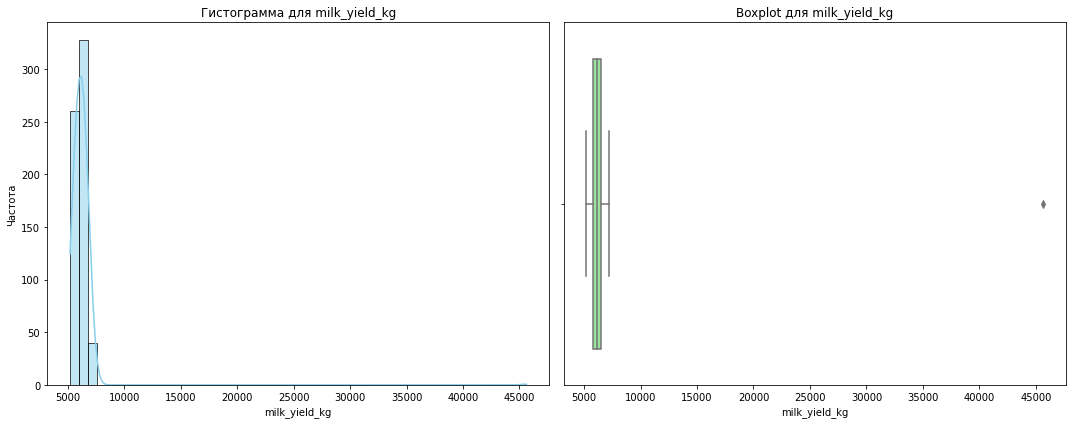

In [40]:
# Выполним анализ признака milk_yield_kg
analyze_quantitative(ferma_main, 'milk_yield_kg')

Отобразим анамалию в признаке milk_yield_kg

In [41]:
ferma_main[ferma_main['milk_yield_kg'] > 10000]

id  milk_yield_kg  energy_feed_unit  crude_protein_kg  \
16  17          45616              11.5             1.675   

    sugar_protein_ratio           breed pasture_type bull_breed  \
16                 0.93  Вис Бик Айдиал    Холмистое     Айдиал   

    fat_content_percent  protein_percent milk_taste age  
16                 3.22            3.076          1   1

In [42]:
# Удалим аномалию
ferma_main = ferma_main.drop(16)

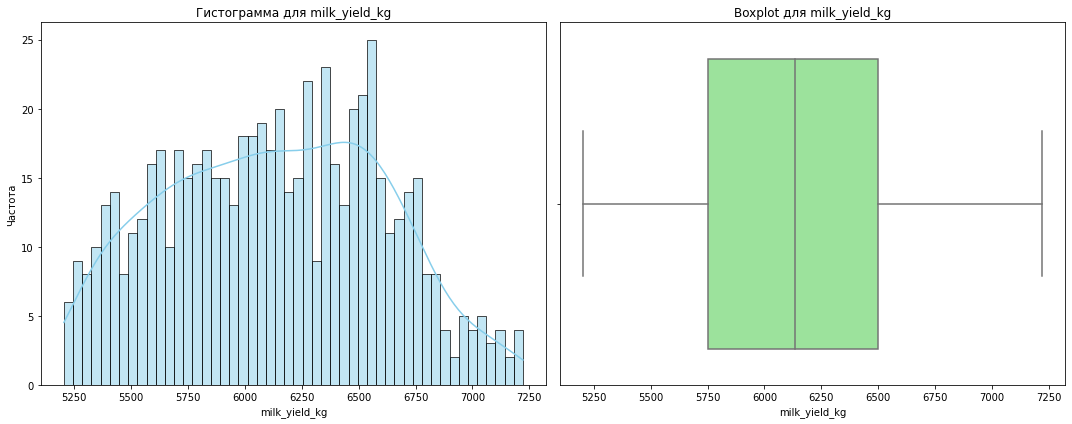

In [43]:
plot_quantitative(ferma_main, 'milk_yield_kg')

Признак mikl_yield_kg обработан успешно, аномалии удаленны. Распределение признака нормальное или близка нормальному. Медиананое значение находится на отметке ~6248


=== Описательная статистика для 'energy_feed_unit' ===
count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64

Количество выбросов в 'energy_feed_unit': 0


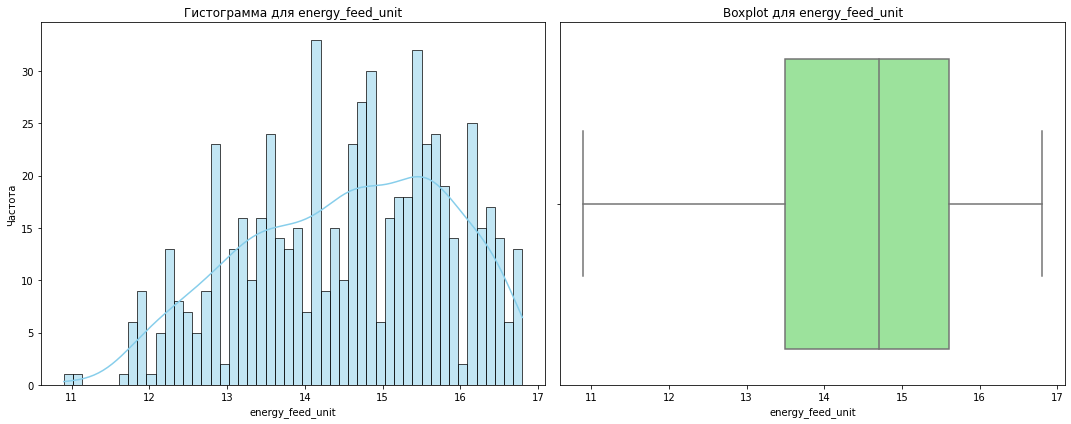

In [44]:
# Выполним анализ признака energy_feed_unit
analyze_quantitative(ferma_main, 'energy_feed_unit')

Признак energy_feed_unit не имеет выбросов. Распределение признака energy_feed_unit близка к нормальному распределению.
Пиковые значения признака находится в диапозоне 14 - 15.5


=== Описательная статистика для 'crude_protein_kg' ===
count    628.000000
mean       1.923760
std        0.182833
min        1.660000
25%        1.771750
50%        1.888000
75%        2.062250
max        2.349000
Name: crude_protein_kg, dtype: float64

Количество выбросов в 'crude_protein_kg': 0


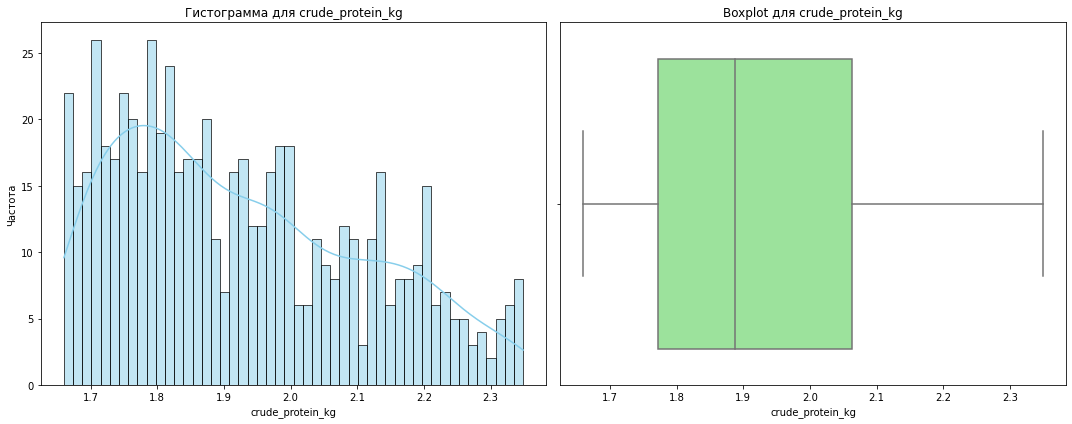

In [45]:
# Выполним анлаиз признака crude_protein_kg
analyze_quantitative(ferma_main, 'crude_protein_kg')

Признак crude_protein_kg не имет выбросов. Распределение признака не выглядит нормальным. В основаном данные распределены всторону < 1.9.


=== Описательная статистика для 'sugar_protein_ratio' ===
count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_ratio, dtype: float64

Количество выбросов в 'sugar_protein_ratio': 0


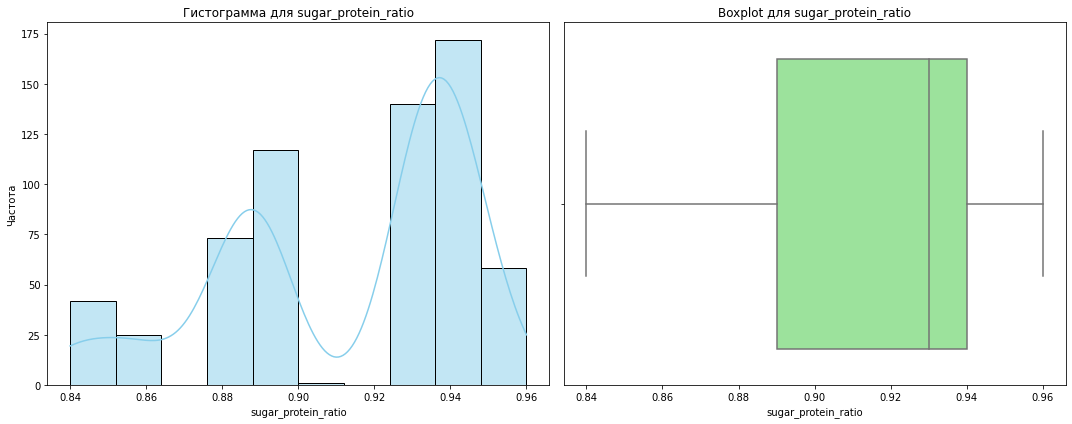

In [46]:
# Выполним анализ признака sugar_protein_ratio
analyze_quantitative(ferma_main, 'sugar_protein_ratio', bins=10)

Признка sugar_protein_ratio не имеет выбросов. Данные не соответствуют нормальному распределению, график имеет 3 независимые группы данных распределенные основоном по возрастанию.

По найденной информации из интернета - "сахаро-протеиновое отношение в рационах лактирующих коров должно быть в пределах 0,8–1,1" можно сдлеать вывод, что значение признака находится в пределах нормы.


=== Описательная статистика для 'fat_content_percent' ===
count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content_percent, dtype: float64

Количество выбросов в 'fat_content_percent': 86


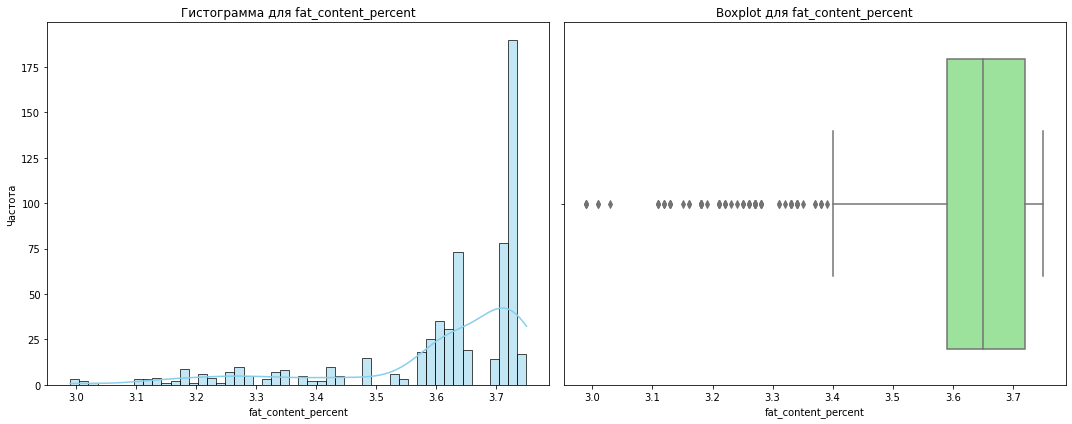

In [47]:
# Выполним анализ признака fat_content_percent
analyze_quantitative(ferma_main, 'fat_content_percent')

Количество выбросов в признаке fat_content_percent - 86, довольно большое количество.

In [48]:
ferma_main[ferma_main['fat_content_percent'] < 3.45]

id  milk_yield_kg  energy_feed_unit  crude_protein_kg  \
3      4           5895              12.4             2.012   
5      6           5254              12.7             1.806   
9     10           5339              13.4             1.791   
10    11           5591              13.7             1.678   
17    18           5777              12.4             1.873   
..   ...            ...               ...               ...   
589  590           5213              12.1             2.016   
591  592           5520              11.9             1.785   
602  603           5594              12.3             1.742   
614  615           5741              12.9             1.749   
622  623           6357              14.2             1.701   

     sugar_protein_ratio            breed pasture_type bull_breed  \
3                  0.885  РефлешнСоверинг    Холмистое     Айдиал   
5                  0.885  РефлешнСоверинг    Холмистое    Соверин   
9                  0.895   Вис Бик Айдиал    Холмистое    Соверин   
10                 0.895  РефлешнСоверинг    Холмистое     Айдиал   
17                 0.895   Вис Бик Айдиал    Холмистое     Айдиал   
..                   ...              ...          ...        ...   
589                0.880  РефлешнСоверинг    Равнинное    Соверин   
591                0.880   Вис Бик Айдиал    Равнинное    Соверин   
602                0.880   Вис Бик Айдиал    Равнинное     Айдиал   
614                0.880  РефлешнСоверинг    Холмистое     Айдиал   
622                0.930  РефлешнСоверинг    Холмистое    Соверин   

     fat_content_percent  protein_percent milk_taste age  
3                   3.40            3.075          0   1  
5                   3.13            3.078          1   0  
9                   3.13            3.075          1   0  
10                  3.13            3.075          1   0  
17                  3.03            3.080          1   1  
..                   ...              ...        ...  ..  
589                 3.19            3.076          0   0  
591                 3.12            3.073          0   0  
602                 3.11            3.077          1   0  
614                 3.44            3.076          1   1  
622                 3.33            3.076          0   1  

[104 rows x 12 columns]

In [49]:
# Удалим выбросы путем фильтрации
ferma_main = ferma_main[ferma_main['fat_content_percent'] >= 3.45]

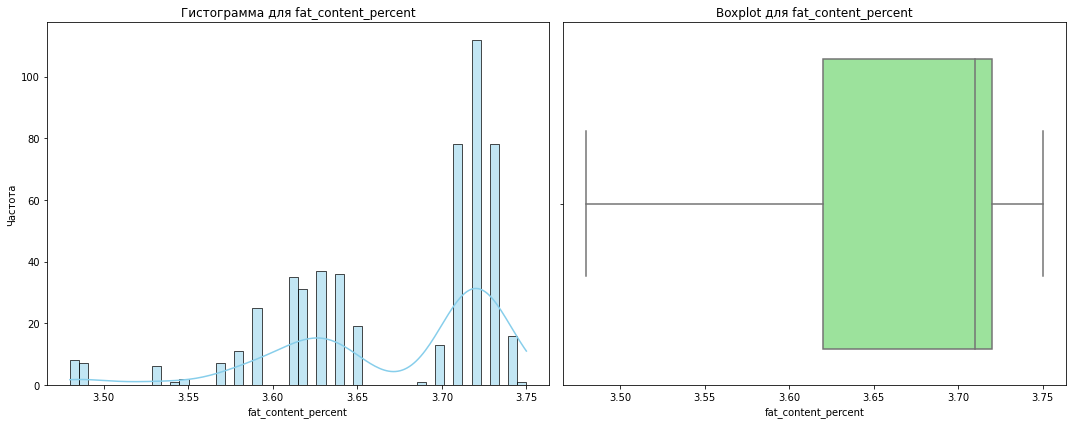

In [50]:
plot_quantitative(ferma_main, 'fat_content_percent')

Выбросы обработаны. График не имеет нормального распределения, что может быть связано с особенностями признака.


=== Описательная статистика для 'protein_percent' ===
count    524.000000
mean       3.075656
std        0.002558
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_percent, dtype: float64

Количество выбросов в 'protein_percent': 4


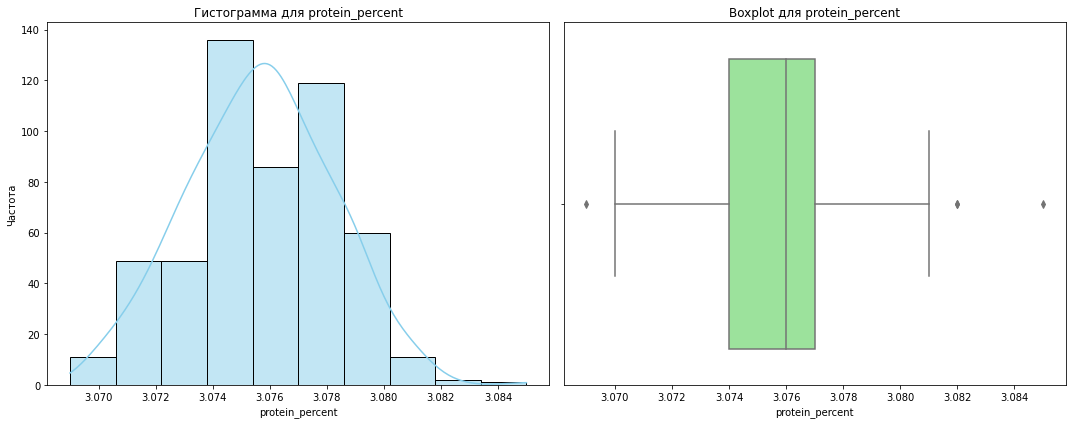

In [51]:
# Выполним анализ признака protein_percent
analyze_quantitative(ferma_main, 'protein_percent', bins=10)

Отобразим выбросы

In [52]:
ferma_main[(ferma_main['protein_percent'] > 3.081) | (ferma_main['protein_percent'] < 3.070)]

id  milk_yield_kg  energy_feed_unit  crude_protein_kg  \
77    78           5871              14.7             1.795   
240  241           5568              13.4             1.733   
426  427           6701              15.7             2.068   
471  472           5883              14.9             2.159   

     sugar_protein_ratio            breed pasture_type bull_breed  \
77                 0.895   Вис Бик Айдиал    Равнинное     Айдиал   
240                0.880   Вис Бик Айдиал    Равнинное    Соверин   
426                0.940  РефлешнСоверинг    Холмистое     Айдиал   
471                0.890   Вис Бик Айдиал    Равнинное    Соверин   

     fat_content_percent  protein_percent milk_taste age  
77                  3.61            3.082          1   1  
240                 3.63            3.069          0   0  
426                 3.72            3.082          1   1  
471                 3.62            3.085          1   1

Удалим выбросы путем фильтрации

In [53]:
ferma_main = ferma_main[~((ferma_main['protein_percent'] > 3.081) | (ferma_main['protein_percent'] < 3.070))]

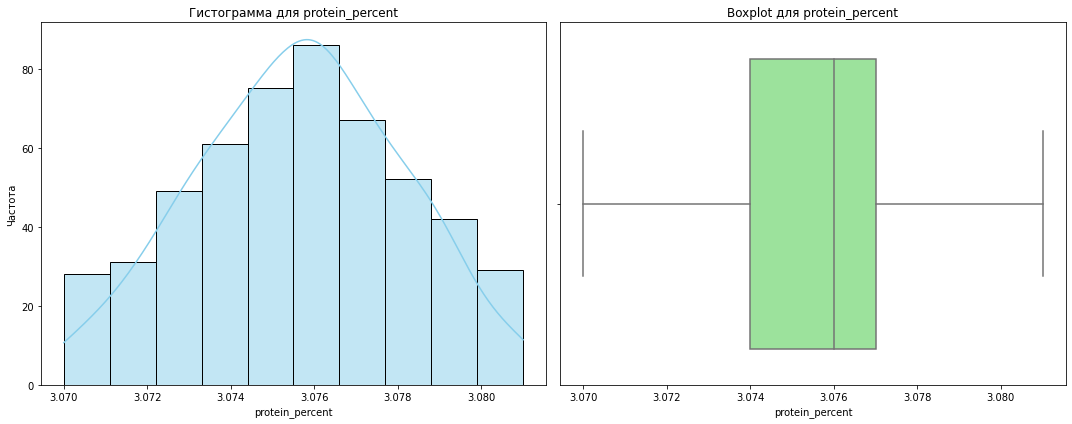

In [54]:
plot_quantitative(ferma_main, 'protein_percent', bins=10)

Распределение признака protein_percent имеет нормальное распределение.

Выполним анализ категориальных призков построением круговой диаграммы

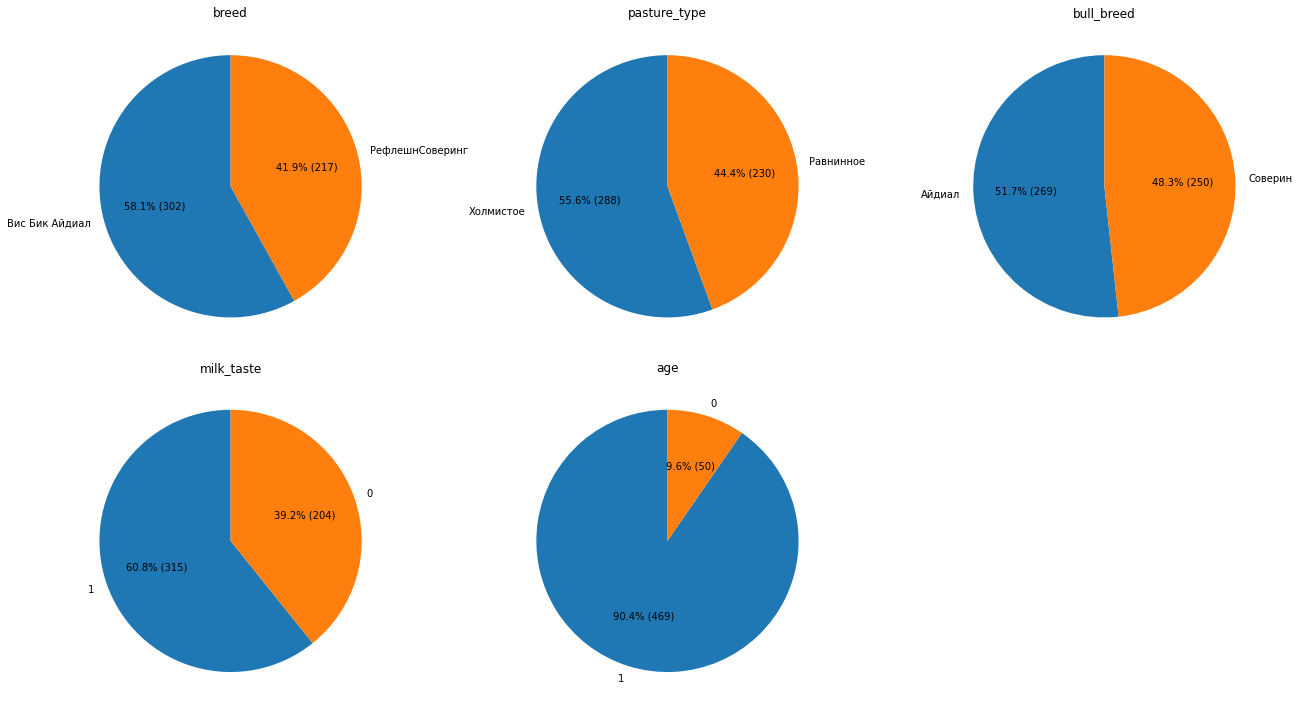

In [55]:
plot_categorical_piecharts(ferma_main)

- Признак `breed` довольно равнораспределен;
- Признак `pasture_type` довольно равнораспределен;
- Признак `bull_breed` довольно равнораспределен;
- Признак `milk_taste` довольно равнораспределен, но в большей степени смещен в строну вкусного молока;
- Признак `age` характеризуется большим распределением в сторону `более_2_лет`.

In [56]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   520 non-null    int64   
 1   milk_yield_kg        520 non-null    int64   
 2   energy_feed_unit     520 non-null    float64 
 3   crude_protein_kg     520 non-null    float64 
 4   sugar_protein_ratio  520 non-null    float64 
 5   breed                520 non-null    object  
 6   pasture_type         520 non-null    object  
 7   bull_breed           520 non-null    object  
 8   fat_content_percent  520 non-null    float64 
 9   protein_percent      520 non-null    float64 
 10  milk_taste           520 non-null    category
 11  age                  520 non-null    category
dtypes: category(2), float64(5), int64(2), object(3)
memory usage: 45.9+ KB


---

Выполним анализ признака в датасете `ferma_dad`:

In [57]:
display(ferma_dad.head())
ferma_dad.shape

id  dad_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

(629, 2)

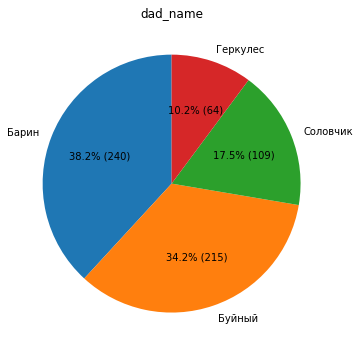

In [58]:
plot_categorical_piecharts(ferma_dad)

Круговая диаграмма признака характеризуется следующим распределением:
- Барин - 38,2%
- Буйный - 34,2%
- Соловчик - 17,5%
- Геркулес - 10,2%

---

Выполним анализ каждого признака в датасете `cow_buy`:

In [59]:
display(cow_buy.head())
cow_buy.shape

breed pasture_type bull_breed  dad_name  fat_content_percent  \
0   Вис Бик Айдиал    Холмистое     Айдиал  Геркулес                 3.58   
1   Вис Бик Айдиал    Равнинное    Соверин    Буйный                 3.54   
2  РефлешнСоверинг    Равнинное    Соверин     Барин                 3.59   
3  РефлешнСоверинг    Холмистое     Айдиал    Буйный                 3.40   
4  РефлешнСоверинг    Равнинное     Айдиал    Буйный                 3.64   

   protein_percent          age  
0            3.076  более_2_лет  
1            3.081  менее_2_лет  
2            3.074  более_2_лет  
3            3.061  более_2_лет  
4            3.074  более_2_лет

(20, 7)


=== Описательная статистика для 'fat_content_percent' ===
count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: fat_content_percent, dtype: float64

Количество выбросов в 'fat_content_percent': 0


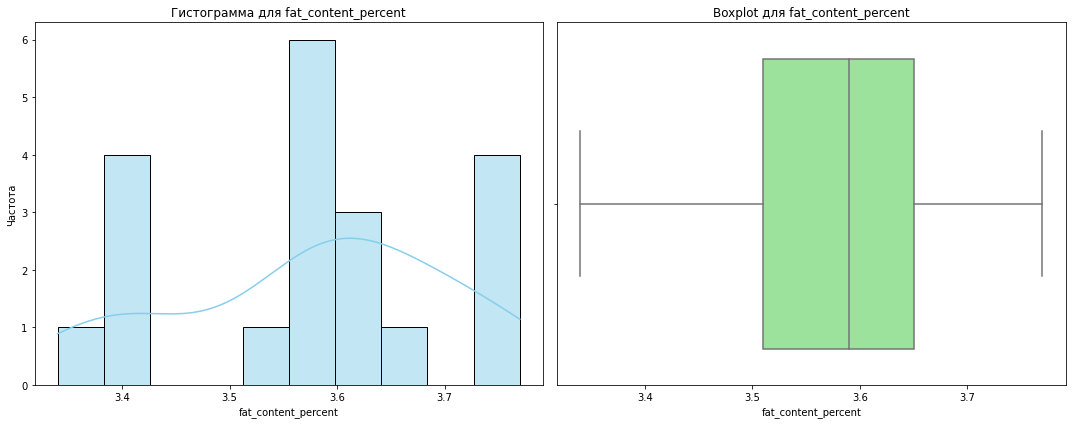

In [60]:
analyze_quantitative(cow_buy, 'fat_content_percent', bins=10)

Признак не имеет нормального распределения, что может являться следствием маленькой размерности датасета. Медиана признака находится на отметке 3.59


=== Описательная статистика для 'protein_percent' ===
count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: protein_percent, dtype: float64

Количество выбросов в 'protein_percent': 1


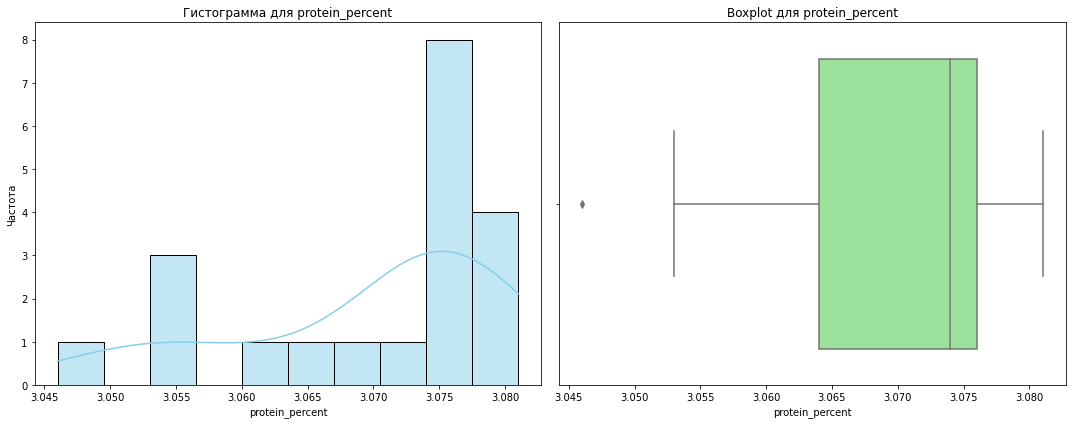

In [61]:
analyze_quantitative(cow_buy, 'protein_percent', bins=10)

Отобразим выброс

In [62]:
cow_buy[cow_buy['protein_percent'] <= 3.050]

breed pasture_type bull_breed  dad_name  fat_content_percent  \
12  Вис Бик Айдиал    Холмистое     Айдиал  Геркулес                 3.68   

    protein_percent          age  
12            3.046  более_2_лет

Решено не удалять выброс из-за малого количества данных, а также считаю, что расхождение между медианой и «выбросом» незначительным.

Признак protein_percent имеет обрывочный характер. Медиана находится на отметке 3,074 и смещена ближе к Q3.

Выполним анализ категориальных призков построением круговой диаграммы

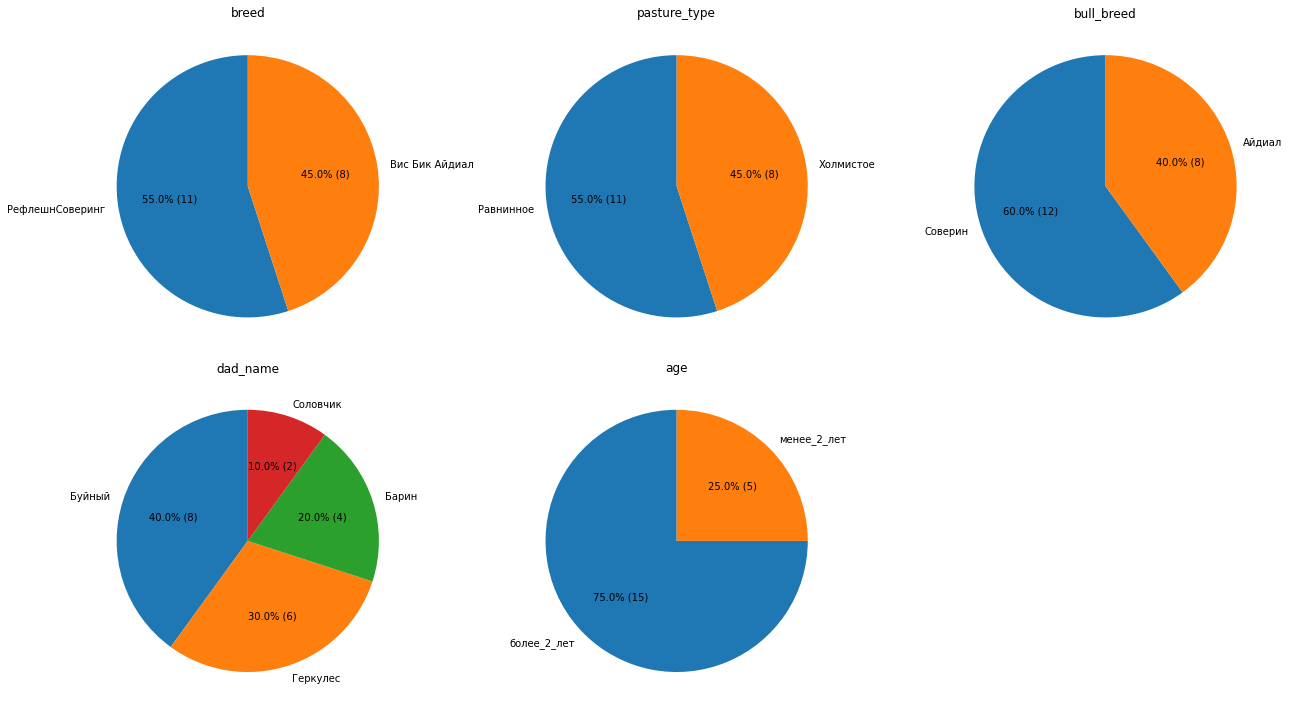

In [63]:
plot_categorical_piecharts(cow_buy)

- Признак `breed` довольно равнораспределен;
- Признак `pasture_type` довольно равнораспределен;
- Признак `bull_breed` довольно равнораспределен;
- Признак `dad_name` распределен следующим образом: `Бурный - 40%`, `Геркулес - 30%`, `Барин - 20%`, `Соловчик - 10%`;
- Признак `age` характеризуется большим распределением в сторону `более_2_лет`.

In [64]:
# Подсчет количества случаев, где удой коровы больше 6000
ferma_main.pivot_table(
    index=ferma_main['milk_yield_kg'] > 6000,  # Условие: удой больше 6000
    values='milk_yield_kg',
    aggfunc='count'
).squeeze()

milk_yield_kg
False    162
True     358
Name: milk_yield_kg, dtype: int64

In [65]:
# Подсчет количества случаев, где вкус молока равно - вкусно
ferma_main.pivot_table(
    index=ferma_main['milk_taste'] == 1,  # Условие: удой больше 6000
    values='milk_taste',
    aggfunc='count'
).squeeze()

milk_taste
False    204
True     316
Name: milk_taste, dtype: int64

In [66]:
# Содная таблица для определения породы с лучшим вкусом молока, для'ferma_main'
pd.pivot_table(
    ferma_main.query('milk_taste == 1'),
    columns='breed',
    values='milk_taste',
    aggfunc='count'
)

breed       Вис Бик Айдиал  РефлешнСоверинг
milk_taste             185              131

Из полученной сводной таблицы, можно сказать, что у породы Вис Бик Айдал, в основом более вкусное молоко.

In [67]:
# Создадим сводную таблицу для определения зависимотси вкуса молока от типа пастбища, для 'frema_main'
pd.pivot_table(
    ferma_main.query('milk_taste == 1'),
    columns='pasture_type',
    values='milk_taste',
    aggfunc='count'
)

pasture_type  Равнинное  Холмистое
milk_taste          125        191

С помощью сводной таблицы определили, что коровы с типом пастбища - Холмистое имеют более вкусное молоко

In [68]:
# Создадим сводную таблицу для определения зависимотси вкуса молока от породы папы быка, для 'frema_main'
pd.pivot_table(
    ferma_main.query('milk_taste == 1'),
    columns='bull_breed',
    values='milk_taste',
    aggfunc='count'
)

bull_breed  Айдиал  Соверин
milk_taste     159      157

Вкус молока в зависимости от породы папы быка не отличается

In [69]:
# Опрееделим, влияние ладшафта на показатели молока, для 'ferma_main'
pd.pivot_table(
    ferma_main,
    columns='pasture_type',
    values=['milk_yield_kg', 'fat_content_percent', 'protein_percent'],
    aggfunc='mean'
).T.reset_index()

pasture_type  fat_content_percent  milk_yield_kg  protein_percent
0    Равнинное             3.672554    6156.147186         3.075316
1    Холмистое             3.670865    6280.013841         3.075875

Определено, что тип пастбища не влияет на показатели молока

In [70]:
# Опрееделим, влияние породы папы быка на показатели молока, для 'ferma_main'
pd.pivot_table(
    ferma_main,
    columns='bull_breed',
    values=['milk_yield_kg', 'fat_content_percent', 'protein_percent'],
    aggfunc='mean'
).T.reset_index()

bull_breed  fat_content_percent  milk_yield_kg  protein_percent
0     Айдиал             3.670186    6415.513011          3.07568
1    Соверин             3.673147    6020.800797          3.07557

Определено, что тип категориальный признак - порода папы быка не влияет на показатели молока

In [71]:
# Сводная таблица для определения характеристик молока в зависимости от породы коровы, для датасета 'ferma_main'
pd.pivot_table(
    ferma_main,
    columns='breed',
    values=['milk_yield_kg', 'fat_content_percent', 'protein_percent'],
    aggfunc='mean',
).T.reset_index()

breed  fat_content_percent  milk_yield_kg  protein_percent
0   Вис Бик Айдиал             3.666821    6205.384106         3.076291
1  РефлешнСоверинг             3.678257    6252.146789         3.074706

Определено, что порода коровы не влияет на показатели молока

>**Промежуточные выводы**
>
>**ferma_main**
> - признак `milk_yield_kg` обработан, медианное значение находится на отметке `~6248`;
> - признак `energy_feed_unit` не имеет выбросов. Пиковые значения признака находятся в диапазоне `14–15,5`;
> - признак `crude_protein_g` не имеет выбросов. В основном данные распределены в сторону `<1,9`;
> - признак `sugar_protein_ratio` не имеет выбросов. График имеет 3 независимых пика. Признак находится в пределах нормы;
> - признак `fat_content_percent` обработан. График фрагментарный, что может быть связано с особенностями признака;
> - признак `protein_percent` после обработки имеет нормальное распределение, медианное значение находится на отметке `~3,076`;
> - признак `breed` имеет довольно равное распределение между категориями: `Вис Бич Айдиал — 58,1%`, `РефлешнСоверинг — 41,9%`;
> - признак `pasture_type` доволь довольно равно распределен между категориями: `Холмистое — 55,6%`, `Равниное — 44,4%`;
> - признак `bull_breed` имеет по имеет почти равное распределение между категориями: `Айдиал — 51,7%`, `Соверинг — 48,3%`;
> - признак `milk_taste` смещен в смещен в сторону `1 (вкусного молока) — 60,8%`;
> - признак `age` сильно смещен в сильно смещен в сторону `более_2_лет — 90,4%`.
>
>**ferma_dad**
> - признак `dad_name` имеет следущее распределение: `Барин - 38,2%`; `Буйный - 34,2%`; `Соловчик - 17,5%`; `Геркулес - 10,2%`.
>
>**cow_buy**
> - признак `fat_content_percent` характеризуется фрагментарным графиком. Медиана признака находится на отметке `3.59`;
> - признак `protein_percent` имеет обрывочный характер. Медиана находится на отметке `3,074` и смещена ближе к Q3.
> - признак `breed` довольно равнораспределен, `Вис Бич Айдиал — 45,0%`, `РефлешнСоверинг — 55,0%`;
> - признак `pasture_type` довольно равнораспределен, `Холмистое — 45,0%`, `Равниное — 55,0%`;
> - признак `bull_breed` довольно равнораспределен `Айдиал — 40,0%`, `Соверинг — 60,0%`;
> - признак `dad_name` распределен следующим образом: `Бурный - 40%`, `Геркулес - 30%`, `Барин - 20%`, `Соловчик - 10%`;
> - признак `age` характеризуется большим распределением в сторону `более_2_лет - 75,0%`.

## Корреляционный анализ

### Матрица корреляций

Посмтроим матрицу корреляция и определим взяимосвязь между всеми признаками

In [72]:
corr_heatmap = [col for col in ferma_main if col != 'id']
corr_heatmap

['milk_yield_kg',
 'energy_feed_unit',
 'crude_protein_kg',
 'sugar_protein_ratio',
 'breed',
 'pasture_type',
 'bull_breed',
 'fat_content_percent',
 'protein_percent',
 'milk_taste',
 'age']

In [73]:
# Выполним дополнительное преобразование типа данных для 'milk_taste' и 'age', чтобы построить матрицу корреляций
ferma_main_corr = ferma_main.copy()
ferma_main_corr['milk_taste'] = ferma_main_corr['milk_taste'].astype('int')
ferma_main_corr['age'] = ferma_main_corr['age'].astype('int')
ferma_main_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   520 non-null    int64  
 1   milk_yield_kg        520 non-null    int64  
 2   energy_feed_unit     520 non-null    float64
 3   crude_protein_kg     520 non-null    float64
 4   sugar_protein_ratio  520 non-null    float64
 5   breed                520 non-null    object 
 6   pasture_type         520 non-null    object 
 7   bull_breed           520 non-null    object 
 8   fat_content_percent  520 non-null    float64
 9   protein_percent      520 non-null    float64
 10  milk_taste           520 non-null    int64  
 11  age                  520 non-null    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 52.8+ KB


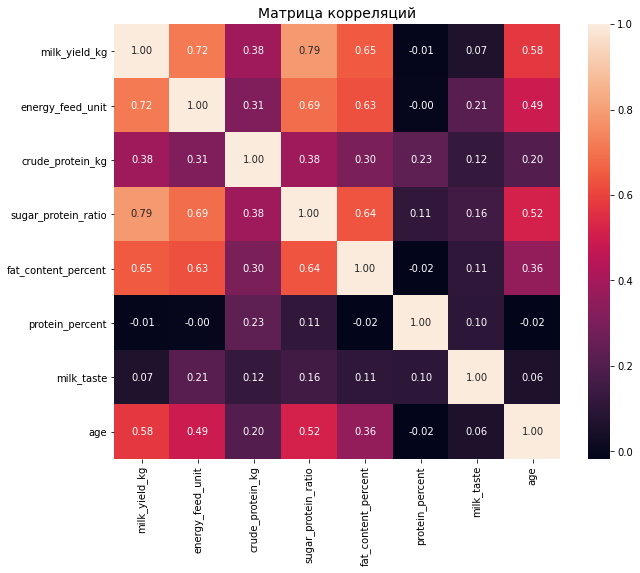

In [74]:
plt.figure(figsize=(10, 8))
sns.heatmap(ferma_main_corr[corr_heatmap].corr(), annot=True, fmt='.2f')
plt.title('Матрица корреляций', fontsize=14)
plt.show()

Исходя из полученного графика, сделаем выводы, что целевой признак `milk_yield_kg` имеет довольно высокую корреляцию по шкале Чеддока с признаками `energy_feed_unit - 0.72`, `sugar_protein_ratio - 0.79`. Заметная корреляция с признаком `fat_content_percent - 0.65` и `age`. Странно, что у признака `crude_protein_kg` имеет умеренную корреляцию с целевым признаком - `0.38`, так как этот признак относится к характеристики корма, а с `protein_percent` - имеет отрицательную корреляцию.

Целевой признак `milk_taste` имеет умеренные положительные связи с признаками `energy_feed_unit - 0.21` и `sugar_protein_ratio - 0.16`. Остальные признаки (`fat_content_percent - 0.11`, `crude_protein_kg - 0.12`, `protein_percent - 0.1`) оказывают слабое влияние. В отношении двух целевых признаков `milk_yield_kg` и `milk_taste` можно сказать, что нет линейной зависимости.

Также заметная корреляция между признаками `energy_feed_unit`, `sugar_protein_ratio` и `fat_content_percent`. Высокая корреляция между признаками может говорить о мультиколлениальности, что может привести к неустойчивости коэффициентов. Но по инофрмации из учебных материалов Яндекс Практикума, о высокой мультиколлениальности можно судить при показателях коэффициента от 0.90 до 0.95.

### Диаграмма рассеяния

Построим графики диаграмм рассеяния для целевого признака `milk_yield_kg` и всех количественных и признаков. При этом точки на графике будут окрашены в зависимости от категориального признака

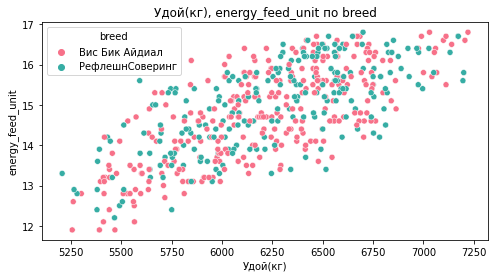

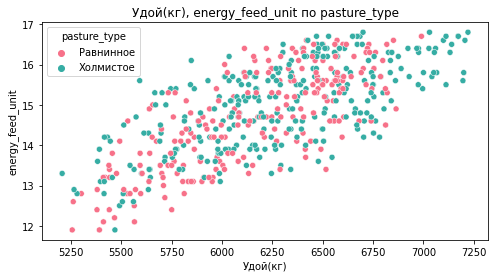

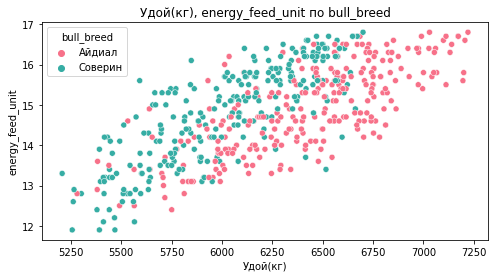

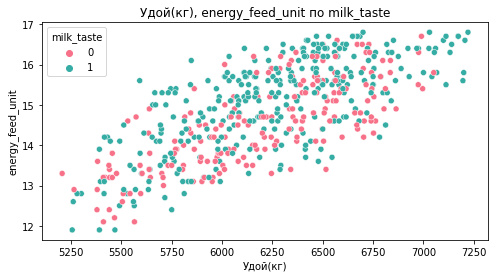

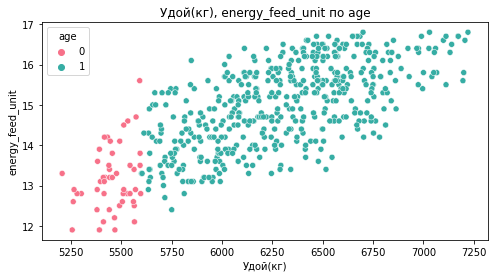

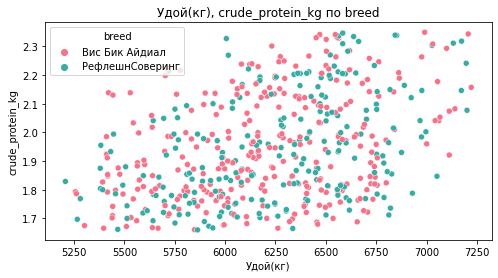

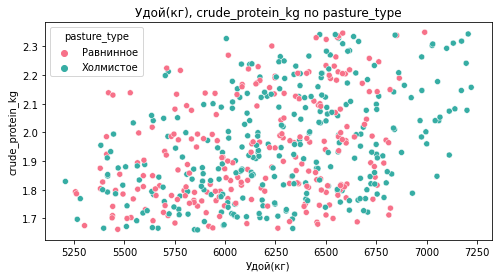

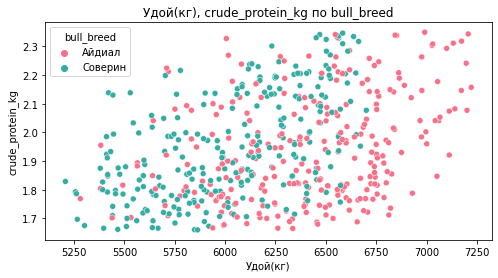

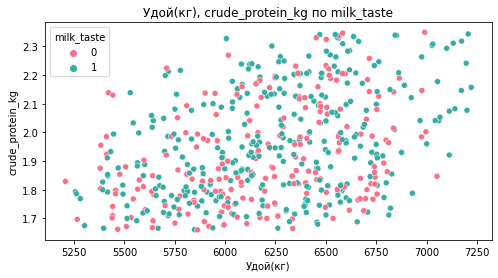

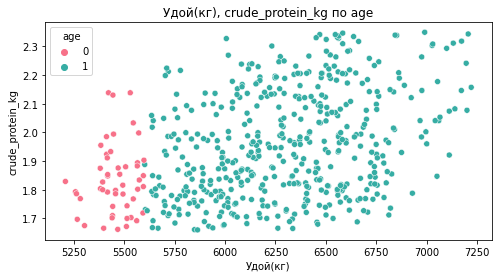

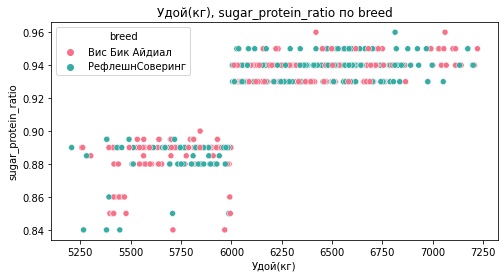

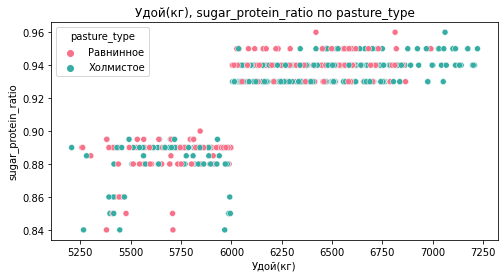

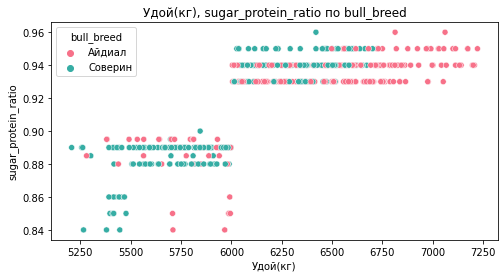

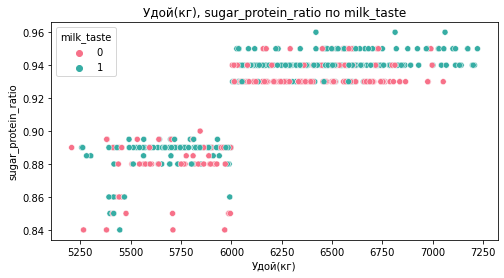

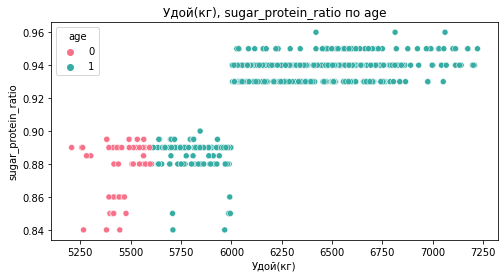

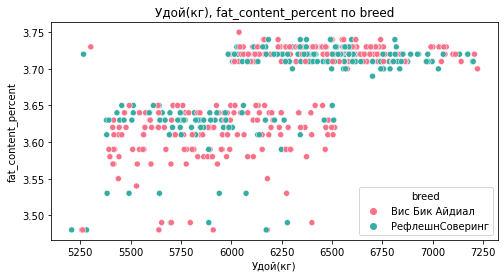

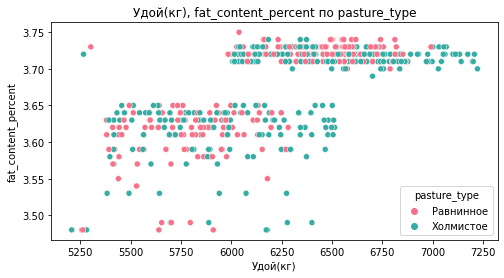

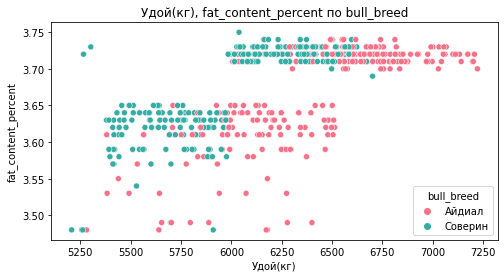

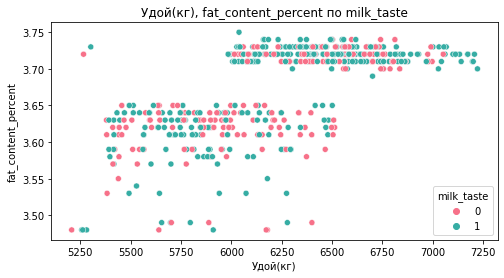

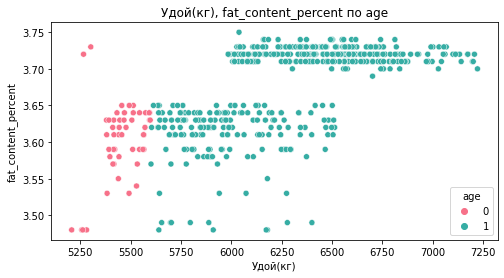

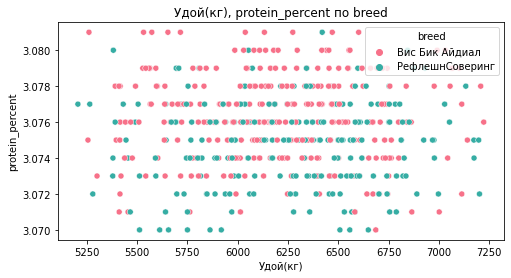

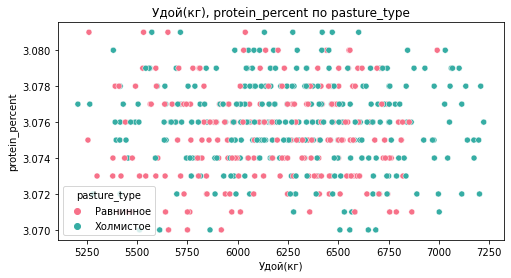

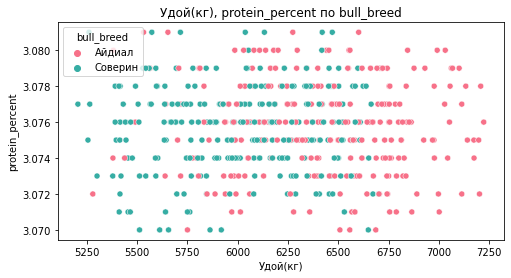

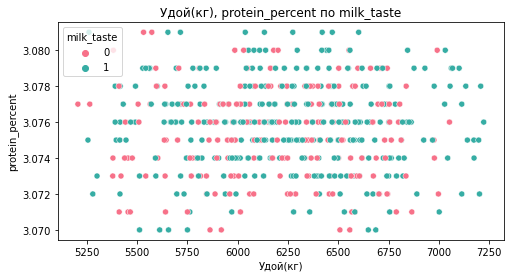

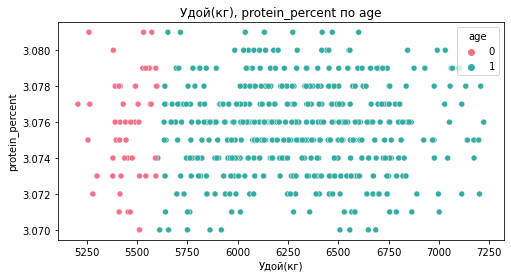

In [75]:
ferma_main_qua = ferma_main.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Исключаем ненужный столбец из количественных признаков
ferma_main_qua.remove('id')
ferma_main_qua.remove('milk_yield_kg')

ferma_main_cat = ferma_main.select_dtypes(include=['object', 'category']).columns.tolist()

for i in ferma_main_qua:
    for j in ferma_main_cat:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=ferma_main, x='milk_yield_kg', y=i, hue=j, palette='husl')
        plt.title(f'Удой(кг), {i} по {j}')
        plt.xlabel('Удой(кг)')
        plt.show()

>**Промежуточные выводы**
>
>**Матрица корреляций**
>
> Прослеживается положительная корреляция между целевым признаком `milk_yeld_kg` и входными признаками `energy_feed_unit`, `sugar_protein_ratio`, `fat_content_percent` и умеренную корреляцию с входным признаком `crude_protein_g`.
>
> Исходя из полученных данных можно сделать  вывод, что целевой признак `Удой` зависит от характеристики корма. Стоит отметить, что признаки относящиеся к характеристике корма, имеют также корреляцию между с собой, но не достигают высокой степени, что может говорить об отсутствии мультиколлинеарности. По матрице корреляции также можно сделать вывод о том, что признак `protein_percent` имеет отрицательную корреляцию с признаком `Удой`. По этой причине при обучении модели стоит его отбросить.
>
> Для целевого признака `Вкус молока` присутствуют слабые корреляции в датасете.
>
>**Диаграмма рассеяния**
>
> По диаграмме рассеяния, построенной в корреляции с целевым признаком `milk_yeld_kg` где цвет точек определяется категориальным признаком, можно сделать выводы, что:
> - Вне зависимости от количественных признаков, категориальные признаки `breed`, `pasture_type`, `bull_breed` и `milk_taste`, целевой признак `Удой` у коров в основном равномерно распределен и равен 6000 кг за год. Также можно сказать, что коровы с возрастом менее 2 лет, не удовлетворяют целевому показателю продуктивности
> - Между целевым признаком `Удой` и `energy_feed_unit`, наблюдается не линейная связь, хоть и матрица корреляции указывала о сильной зависимости;
> - Между целевым признаком `Удой` и `crude_protein_g`, по диаграмме рассеяния не наблюдается линейной зависимости;
> - Между целевым признаком `Удой` и `sugar_protein_ratio`, видны характерные для этого признака "пробелы" в между значениями. Полученный график вызывает сомнение. Данный признак можно отнести к категориальному признаку;
> - Между целевым признаком `Удой` и `fat_content_percent`, прослеживается аналогичная картина как и в случае с признаком `sugar_protein_ratio`.
> - Между целевым признаком `Удой` и `protein_percent`, по диаграмме рассеяния видно отсуствие, линейной зависимости.

## Обучение модели линейной регрессии

### Подготовка данных датасета `ferma_main`

Для начала отберем признаки, подходящие для построения модели линейной регрессии.
В итоговый список, в зависимости от наличия или отсутствия линейной зависимости, а также опираясь на причинно-следственные связи между группами признаков, войдут следующие признаки:
Группа относящиеся к характеристикам корма и характеристике молока:
 - `energy_feed_unit`
 - `crude_protein_g`
 - `sugar_protein_ratio`
 - `fat_content_percent`

Приведенные признаки выше имеют причинно-следственную связь относящиеся к целевому признаку - `Удой`. Аргументом их использования является влияние корма на характеристики молока и удой в целом.

Также стоит рассмотреть категориальные признаки относящиеся группе - характеристики коровы:
 - `bull_breed`
 - `age`

Аргументом использования данных признаков можно считать полученные диаграммы рассеяния, в котором видно их влияние на целевой признак - `Удой`.

Исключены будут все оставшиеся входные признаки:
 - `breed`
 - `pasture_type`
 - `protein_percent`

### Обучение первой модели линейной регрессии

#### Подготовка данных

Разобьем датасет на таргет и фичи

In [76]:
X = ferma_main.drop(['milk_yield_kg', 'id', 'breed', 'pasture_type', 
                     'protein_percent', 'milk_taste'], axis=1) # входные признаки
y = ferma_main['milk_yield_kg'] # целевой признак

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

Выполним проверку полученных датафреймов

In [77]:
X.head()

energy_feed_unit  crude_protein_kg  sugar_protein_ratio bull_breed  \
0              14.2             1.743                0.890     Айдиал   
1              12.8             2.138                0.890    Соверин   
2              14.0             1.854                0.885    Соверин   
4              12.8             1.675                0.885    Соверин   
6              13.2             1.792                0.885    Соверин   

   fat_content_percent age  
0                 3.58   1  
1                 3.54   0  
2                 3.59   1  
4                 3.73   0  
6                 3.48   1

In [78]:
y.head()

0    5863
1    5529
2    5810
4    5302
6    5910
Name: milk_yield_kg, dtype: int64

In [79]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(390, 6)

(130, 6)

(390,)

(130,)

#### Масштабирование и кодировка признаков

In [80]:
# Выполним масштабирование количественных признаков
num_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()

# Применяем масштабирование к тренировочным и тестовым данным
X_train_scaler = scaler.fit_transform(X_train[num_columns])
X_test_scaler = scaler.transform(X_test[num_columns])

# Создадим датафремы
X_train_scaler = pd.DataFrame(X_train_scaler, columns=num_columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=num_columns)

In [81]:
# Выполним кодирование категориальных признаков
cat_columns = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

ohe = OneHotEncoder(sparse=False, drop='first')

# Применяем масштабирование к тренировочным и тестовым данным
X_train_ohe = ohe.fit_transform(X_train[cat_columns])
X_test_ohe = ohe.transform(X_test[cat_columns])

# Сохраним список новых столбоц
ohe_col_name = ohe.get_feature_names()

# Создадим датафремы
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_col_name)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_col_name)

In [82]:
# Объединим маштабирование и кодировку данных в датафрем
X_train = pd.concat([X_train_ohe, X_train_scaler], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaler], axis=1)

Проверим полученные датафреймы

In [83]:
display(X_train.head())
display(X_train.shape)
display(X_test.head())
X_test.shape

x0_Соверин  x1_1  energy_feed_unit  crude_protein_kg  sugar_protein_ratio  \
0         0.0   1.0          1.744650          1.156219             1.075091   
1         1.0   1.0         -1.258603         -1.544032            -1.431312   
2         1.0   1.0         -0.021969          1.211438             1.075091   
3         1.0   1.0          0.508016         -1.295543            -1.073255   
4         0.0   1.0          0.949671          0.543278             0.358976   

   fat_content_percent  
0             0.451869  
1            -0.503301  
2             0.611064  
3            -0.662496  
4             0.611064

(390, 6)

x0_Соверин  x1_1  energy_feed_unit  crude_protein_kg  sugar_protein_ratio  \
0         1.0   1.0         -0.463624         -0.848262            -1.431312   
1         1.0   1.0         -1.346934         -0.329195            -1.073255   
2         0.0   1.0         -0.551955         -0.163536             0.717033   
3         1.0   1.0          0.508016          0.278223             0.717033   
4         0.0   1.0          1.302995          1.647675             0.358976   

   fat_content_percent  
0            -0.344106  
1            -1.617667  
2             0.611064  
3             0.929454  
4             0.770259

(130, 6)

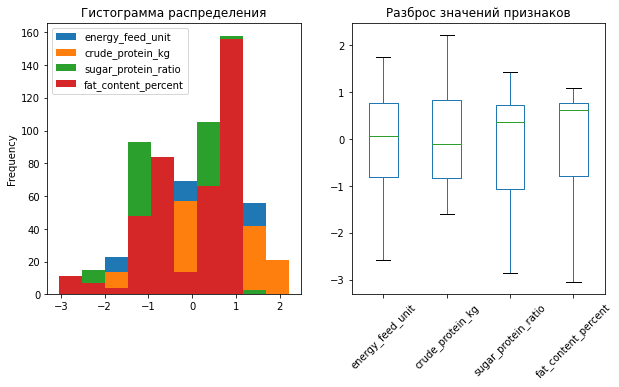

In [84]:
# Построим графики по количественным признакам тренировочного датафрейма
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_columns].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_columns].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данные успешно отмасштабированы

#### Обучение модели

In [85]:
# Импортируем модель
model_lr = LinearRegression()

# Обучим модель на тренировочной выборке
model_lr.fit(X_train, y_train)

# Сохраним результаты предсказания
predictions = model_lr.predict(X_test)

#### Оценка качества модели

In [86]:
# Рассчитаем коэффициент детерминации R²
r2 = r2_score(y_test, predictions)
print(f'Коэффициент детерминации R² = {r2}')

Коэффициент детерминации R² = 0.7952607779879699


Выполним анализ остатокв

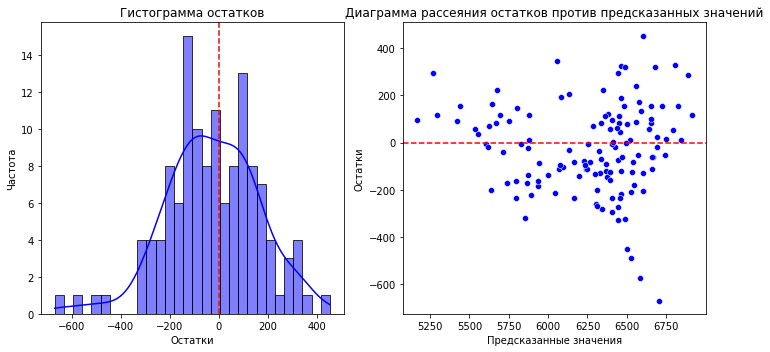

In [87]:
# Рассчитаем остатки
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Гистограмма остатков
sns.histplot(residuals, kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title('Гистограмма остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частота')
axes[0].axvline(0, color='red', linestyle='--')  # Добавляем красную линию по оси X=0

# Диаграмма рассеяния: Остатки против предсказанных значений
sns.scatterplot(x=predictions, y=residuals, color='blue', ax=axes[1])
axes[1].set_title('Диаграмма рассеяния остатков против предсказанных значений')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')
axes[1].axhline(0, color='red', linestyle='--')  # Добавляем красную линию по оси Y=0

# Улучшаем расположение графиков
plt.tight_layout()
plt.show()

По полученным результатам оценки качества модели можно сделать следующие выводы:

- Коэффициент детерминации R², которая равна 0.795, показал, что модель отлично справляется с предсказанием целевого признака `Удой`. Это значит, что предсказанные значения на 79.5% ближе к истине, чем среднее значение целевого признака;
- Анализ остатков показал, что модель следует доработать. Это видно по построенной частотной гистограмме (нормальное распределение, смещенное влево), которое сообщает нам о завышении предсказанных значениях. Также о проблемах модели можно понять по диаграмме рассеяния, имеющей непостоянство остатков;

Исходя из полученных графиков, можно прийти к выводу, что полученную модель для предсказания целевого признака `Удой` использовать нельзя.

### Обучение модели линейной регрессии с учетом ошибок

Выполним работу над ошибками и построим новую модель линейной регрессии

Подготовка датасета **ferma_main**

В первой простоенной модели входили следующие количественные признаки.
Группа относящиеся к характеристикам корма и характеристике молока:
 - `energy_feed_unit`
 - `crude_protein_g`
 - `sugar_protein_ratio`
 - `fat_content_percent`

В новой модели изменим тип признака `sugar_protein_ratio` с количественного на категориальный бинарный. Выяснилось, что ранее отмеченный "пробел", на отметке 6000 кг на диаграмме рассеяния, между группами это признак существования границы между кластером.
Такой же пробел и замечен у признака `fat_content_percent`, изменим его тип с количественного на категориальный.

Признак `energy_feed_unit` будет возведен в квадрат, чтобы признак стал линейным.

Исключен будет признак:
 - `protein_percent`

In [88]:
# Изменим тип данных признака `sugar_protein_ratio`
threshold = 0.92 # Установим пороговое значение

# Преобразование признака
ferma_main['sugar_protein_ratio'] = (ferma_main['sugar_protein_ratio'] > threshold).astype('category')
ferma_main['sugar_protein_ratio'].value_counts()

True     358
False    162
Name: sugar_protein_ratio, dtype: int64

In [89]:
# Изменим тип данных признака `fat_content_percent`
threshold = 3.66 # Установим пороговое значение

# Преобразование признака
ferma_main['fat_content_percent'] = (ferma_main['fat_content_percent'] > threshold).astype('category')
ferma_main['fat_content_percent'].value_counts()

True     298
False    222
Name: fat_content_percent, dtype: int64

#### Подготовка данных

In [90]:
X_2 = ferma_main.drop(['milk_yield_kg', 'id', 
                     'protein_percent', 'milk_taste'], axis=1) # входные признаки
y_2 = ferma_main['milk_yield_kg'] # целевой признак

X_2['energy_feed_unit'] = X_2['energy_feed_unit'] ** 2

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2,
    y_2,
    random_state=RANDOM_STATE
)

Выполним проверку полученных датафреймов

In [91]:
display(X_train_2.shape)
display(X_test_2.shape)
display(y_train_2.shape)
display(y_test_2.shape)

(390, 8)

(130, 8)

(390,)

(130,)

In [92]:
X_train_2.head()

energy_feed_unit  crude_protein_kg sugar_protein_ratio            breed  \
70             282.24             2.157                True   Вис Бик Айдиал   
607            179.56             1.668               False   Вис Бик Айдиал   
413            219.04             2.167                True  РефлешнСоверинг   
532            237.16             1.713               False  РефлешнСоверинг   
488            252.81             2.046                True  РефлешнСоверинг   

    pasture_type bull_breed fat_content_percent age  
70     Холмистое     Айдиал                True   1  
607    Холмистое    Соверин               False   1  
413    Равнинное    Соверин                True   1  
532    Холмистое    Соверин               False   1  
488    Равнинное     Айдиал                True   1

In [93]:
X_test_2.head()

energy_feed_unit  crude_protein_kg sugar_protein_ratio            breed  \
335            204.49             1.794               False   Вис Бик Айдиал   
113            176.89             1.888               False   Вис Бик Айдиал   
8              201.64             1.918                True  РефлешнСоверинг   
198            237.16             1.998                True   Вис Бик Айдиал   
110            265.69             2.246                True   Вис Бик Айдиал   

    pasture_type bull_breed fat_content_percent age  
335    Холмистое    Соверин               False   1  
113    Холмистое    Соверин               False   1  
8      Холмистое     Айдиал                True   1  
198    Холмистое    Соверин                True   1  
110    Равнинное     Айдиал                True   1

#### Выполним масштабирование и кодировку на тренировочной выборке

In [94]:
# Выполним масштабирование количественных признаков
num_columns_2 = X_train_2.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler_2 = StandardScaler()

# Применяем масштабирование к тренировочным и тестовым данным
X_train_scaler_2 = scaler_2.fit_transform(X_train_2[num_columns_2])
X_test_scaler_2 = scaler_2.transform(X_test_2[num_columns_2])

# Создадим датафремы
X_train_scaler_2 = pd.DataFrame(X_train_scaler_2, columns=num_columns_2)
X_test_scaler_2 = pd.DataFrame(X_test_scaler_2, columns=num_columns_2)
display(X_train_scaler_2.head())
X_test_scaler_2.head()

energy_feed_unit  crude_protein_kg
0          1.841964          1.156219
1         -1.249376         -1.544032
2         -0.060770          1.211438
3          0.484761         -1.295543
4          0.955929          0.543278

energy_feed_unit  crude_protein_kg
0         -0.498820         -0.848262
1         -1.329761         -0.329195
2         -0.584624         -0.163536
3          0.484761          0.278223
4          1.343701          1.647675

In [95]:
# Выполним кодирование категориальных признаков
cat_columns_2 = X_train_2.select_dtypes(include=['category', 'object']).columns.tolist()

ohe_2 = OneHotEncoder(sparse=False, drop='first')

# Применяем масштабирование к тренировочным и тестовым данным
X_train_ohe_2 = ohe_2.fit_transform(X_train_2[cat_columns_2])
X_test_ohe_2 = ohe_2.transform(X_test_2[cat_columns_2])

# Сохраним список новых столбоц
ohe_col_name_2 = ohe_2.get_feature_names()

# Создадим датафремы
X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=ohe_col_name_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=ohe_col_name_2)
display(X_train_ohe_2.head())
X_test_ohe_2.head()

x0_True  x1_РефлешнСоверинг  x2_Холмистое  x3_Соверин  x4_True  x5_1
0      1.0                 0.0           1.0         0.0      1.0   1.0
1      0.0                 0.0           1.0         1.0      0.0   1.0
2      1.0                 1.0           0.0         1.0      1.0   1.0
3      0.0                 1.0           1.0         1.0      0.0   1.0
4      1.0                 1.0           0.0         0.0      1.0   1.0

x0_True  x1_РефлешнСоверинг  x2_Холмистое  x3_Соверин  x4_True  x5_1
0      0.0                 0.0           1.0         1.0      0.0   1.0
1      0.0                 0.0           1.0         1.0      0.0   1.0
2      1.0                 1.0           1.0         0.0      1.0   1.0
3      1.0                 0.0           1.0         1.0      1.0   1.0
4      1.0                 0.0           0.0         0.0      1.0   1.0

In [96]:
# Объединим маштабирование и кодировку данных в датафрем
X_train_2 = pd.concat([X_train_ohe_2, X_train_scaler_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaler_2], axis=1)

Проверим полученные датафреймы

In [97]:
display(X_train_2.head())
display(X_train_2.shape)
display(X_test_2.head())
X_test_2.shape

x0_True  x1_РефлешнСоверинг  x2_Холмистое  x3_Соверин  x4_True  x5_1  \
0      1.0                 0.0           1.0         0.0      1.0   1.0   
1      0.0                 0.0           1.0         1.0      0.0   1.0   
2      1.0                 1.0           0.0         1.0      1.0   1.0   
3      0.0                 1.0           1.0         1.0      0.0   1.0   
4      1.0                 1.0           0.0         0.0      1.0   1.0   

   energy_feed_unit  crude_protein_kg  
0          1.841964          1.156219  
1         -1.249376         -1.544032  
2         -0.060770          1.211438  
3          0.484761         -1.295543  
4          0.955929          0.543278

(390, 8)

x0_True  x1_РефлешнСоверинг  x2_Холмистое  x3_Соверин  x4_True  x5_1  \
0      0.0                 0.0           1.0         1.0      0.0   1.0   
1      0.0                 0.0           1.0         1.0      0.0   1.0   
2      1.0                 1.0           1.0         0.0      1.0   1.0   
3      1.0                 0.0           1.0         1.0      1.0   1.0   
4      1.0                 0.0           0.0         0.0      1.0   1.0   

   energy_feed_unit  crude_protein_kg  
0         -0.498820         -0.848262  
1         -1.329761         -0.329195  
2         -0.584624         -0.163536  
3          0.484761          0.278223  
4          1.343701          1.647675

(130, 8)

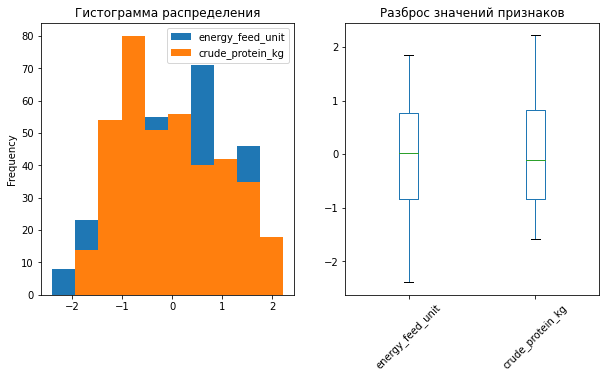

In [98]:
# Построим графики по количественным признакам тренировочного датафрейма
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_2[num_columns_2].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_2[num_columns_2].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данные успешно отмасштабированы

#### Обучение модели линейной регрессии

In [99]:
# Импортируем модель
model_lr_2 = LinearRegression()

# Обучим модель на тренировочной выборке
model_lr_2.fit(X_train_2, y_train_2)

# Сохраним результаты предсказания
predictions_2 = model_lr_2.predict(X_test_2)

#### Оценка качества модели

In [100]:
# Рассчитаем коэффициент детерминации R²
r2_2 = r2_score(y_test_2, predictions_2)
print(f'Коэффициент детерминации R² = {r2_2}')

Коэффициент детерминации R² = 0.8071653631880873


Выполним анализ остатокв

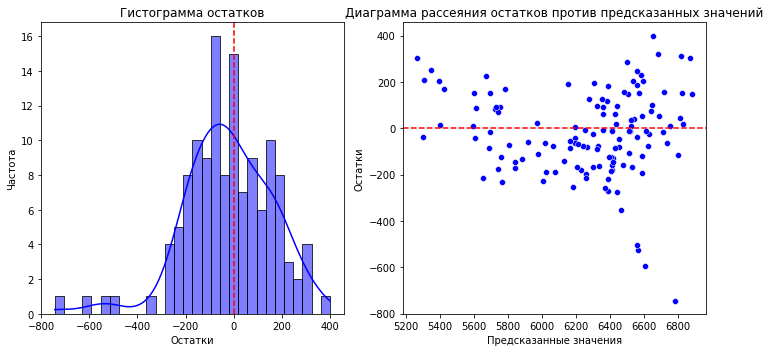

In [101]:
# Рассчитаем остатки
residuals_2 = y_test_2 - predictions_2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Гистограмма остатков
sns.histplot(residuals_2, kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title('Гистограмма остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частота')
axes[0].axvline(0, color='red', linestyle='--')  # Добавляем красную линию по оси X=0

# Диаграмма рассеяния: Остатки против предсказанных значений
sns.scatterplot(x=predictions_2, y=residuals_2, color='blue', ax=axes[1])
axes[1].set_title('Диаграмма рассеяния остатков против предсказанных значений')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')
axes[1].axhline(0, color='red', linestyle='--')  # Добавляем красную линию по оси Y=0

# Улучшаем расположение графиков
plt.tight_layout()
plt.show()

По полученным результатам оценки качества второй модели можно сделать следующие выводы:

- Коэффициент детерминации R², второй модели равен 0.804, при  R²=0.795 у первой модели. Это значит, что предсказанные значения теперь на 80.4% ближе к истине, чем среднее значение целевого признака;
- Анализ остатков показал, что модель следует доработать. Это видно по построенной частотной гистограмме (нормальное распределение, смещенное влево), которое сообщает нам о завышении предсказанных значениях. Вторая модель после внедрения дополнительных категориальных данных, начала предсказывать удой хуже, чем первая модель. Диаграмма рассеяния второй модели, показывает, что у модели непостоянство остатков. График в целом остался примерно таким же, но еще более с худшими результатами;

Исходя из полученных графиков, можно прийти к выводу, что полученную модель для предсказания целевого признака `Удой` использовать нельзя.

### Обучение третьей модели линейной регрессии

Добавим в данные новый признак и обучим на них третью модель

Подготовка датасета новго дата сета **ferma_combined**

In [102]:
# Объединим два датафрейма по столбцу id
ferma_combined = ferma_main.merge(ferma_dad, on='id', how='left')

# Проверим полученый датафрейм
display(ferma_combined.head())
ferma_combined.shape

id  milk_yield_kg  energy_feed_unit  crude_protein_kg sugar_protein_ratio  \
0   1           5863              14.2             1.743               False   
1   2           5529              12.8             2.138               False   
2   3           5810              14.0             1.854               False   
3   5           5302              12.8             1.675               False   
4   7           5910              13.2             1.792               False   

             breed pasture_type bull_breed fat_content_percent  \
0   Вис Бик Айдиал    Равнинное     Айдиал               False   
1   Вис Бик Айдиал    Равнинное    Соверин               False   
2  РефлешнСоверинг    Холмистое    Соверин               False   
3   Вис Бик Айдиал    Равнинное    Соверин                True   
4   Вис Бик Айдиал    Равнинное    Соверин               False   

   protein_percent milk_taste age  dad_name  
0            3.076          1   1    Буйный  
1            3.079          1   0  Соловчик  
2            3.074          0   1     Барин  
3            3.073          1   0     Барин  
4            3.077          1   1  Соловчик

(520, 13)

In [103]:
corr_heatmap = [col for col in ferma_combined if col != 'id']
corr_heatmap

['milk_yield_kg',
 'energy_feed_unit',
 'crude_protein_kg',
 'sugar_protein_ratio',
 'breed',
 'pasture_type',
 'bull_breed',
 'fat_content_percent',
 'protein_percent',
 'milk_taste',
 'age',
 'dad_name']

In [104]:
# Выполним дополнительное преобразование типа данных для 'milk_taste' и 'age', чтобы построить матрицу корреляций
ferma_main_corr = ferma_combined.copy()
ferma_main_corr['milk_taste'] = ferma_main_corr['milk_taste'].astype('int')
ferma_main_corr['age'] = ferma_main_corr['age'].astype('int')
ferma_main_corr['sugar_protein_ratio'] = ferma_main_corr['sugar_protein_ratio'].astype('int')
ferma_main_corr['fat_content_percent'] = ferma_main_corr['fat_content_percent'].astype('int')
ferma_main_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   520 non-null    int64  
 1   milk_yield_kg        520 non-null    int64  
 2   energy_feed_unit     520 non-null    float64
 3   crude_protein_kg     520 non-null    float64
 4   sugar_protein_ratio  520 non-null    int64  
 5   breed                520 non-null    object 
 6   pasture_type         520 non-null    object 
 7   bull_breed           520 non-null    object 
 8   fat_content_percent  520 non-null    int64  
 9   protein_percent      520 non-null    float64
 10  milk_taste           520 non-null    int64  
 11  age                  520 non-null    int64  
 12  dad_name             520 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 56.9+ KB


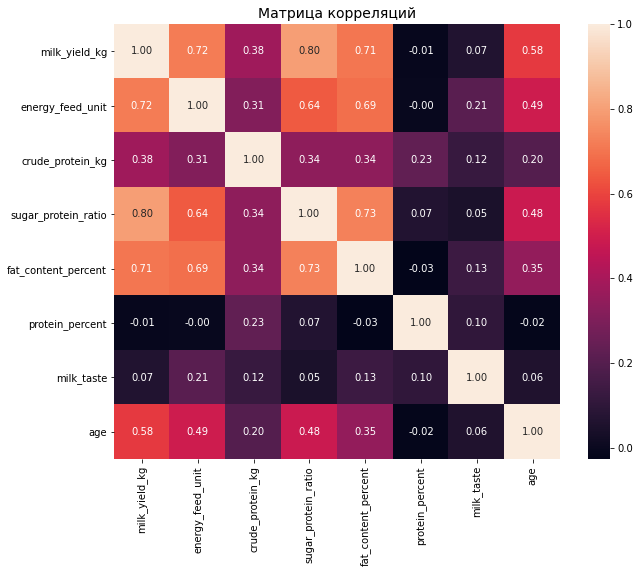

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(ferma_main_corr[corr_heatmap].corr(), annot=True, fmt='.2f')
plt.title('Матрица корреляций', fontsize=14)
plt.show()

В обновленном датасете появился дополнительный категориальный признак `dad_name`.

Признаки `sugar_protein_ratio` и `fat_content_percent` поменяли свой тип и стали категориальными.

Исключен будет признак:
 - `protein_percent`

#### Подготовка данных

Разобьем датасет на таргет и фичи

In [106]:
X_3 = ferma_combined.drop(['milk_yield_kg', 'id', 
                     'protein_percent', 'milk_taste'], axis=1) # входные признаки
y_3 = ferma_combined['milk_yield_kg'] # целевой признак

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3,
    y_3,
    random_state=RANDOM_STATE
)

Выполним проверку полученных датафреймов

In [107]:
display(X_train_3.shape)
display(X_test_3.shape)
display(y_train_3.shape)
display(y_test_3.shape)

(390, 9)

(130, 9)

(390,)

(130,)

In [108]:
X_train_3.head()

energy_feed_unit  crude_protein_kg sugar_protein_ratio            breed  \
56               16.8             2.157                True   Вис Бик Айдиал   
500              13.4             1.668               False   Вис Бик Айдиал   
342              14.8             2.167                True  РефлешнСоверинг   
440              15.4             1.713               False  РефлешнСоверинг   
404              15.9             2.046                True  РефлешнСоверинг   

    pasture_type bull_breed fat_content_percent age  dad_name  
56     Холмистое     Айдиал                True   1  Геркулес  
500    Холмистое    Соверин               False   1  Соловчик  
342    Равнинное    Соверин                True   1     Барин  
440    Холмистое    Соверин               False   1  Соловчик  
404    Равнинное     Айдиал                True   1    Буйный

In [109]:
X_test_3.head()

energy_feed_unit  crude_protein_kg sugar_protein_ratio            breed  \
275              14.3             1.794               False   Вис Бик Айдиал   
93               13.3             1.888               False   Вис Бик Айдиал   
6                14.2             1.918                True  РефлешнСоверинг   
167              15.4             1.998                True   Вис Бик Айдиал   
90               16.3             2.246                True   Вис Бик Айдиал   

    pasture_type bull_breed fat_content_percent age  dad_name  
275    Холмистое    Соверин               False   1  Соловчик  
93     Холмистое    Соверин               False   1     Барин  
6      Холмистое     Айдиал                True   1    Буйный  
167    Холмистое    Соверин                True   1  Соловчик  
90     Равнинное     Айдиал                True   1    Буйный

#### Выполним масштабирование и кодировку на тренировочной выборке

In [110]:
# Выполним масштабирование количественных признаков
num_columns_3 = X_train_3.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler_3 = StandardScaler()

# Применяем масштабирование к тренировочным и тестовым данным
X_train_scaler_3 = scaler_3.fit_transform(X_train_3[num_columns_3])
X_test_scaler_3 = scaler_3.transform(X_test_3[num_columns_3])

# Создадим датафремы
X_train_scaler_3 = pd.DataFrame(X_train_scaler_3, columns=num_columns_3)
X_test_scaler_3 = pd.DataFrame(X_test_scaler_3, columns=num_columns_3)

In [111]:
# Выполним кодирование категориальных признаков
cat_columns_3 = X_train_3.select_dtypes(include=['category', 'object']).columns.tolist()

ohe_3 = OneHotEncoder(sparse=False, drop='first')

# Применяем масштабирование к тренировочным и тестовым данным
X_train_ohe_3 = ohe_3.fit_transform(X_train_3[cat_columns_3])
X_test_ohe_3 = ohe_3.transform(X_test_3[cat_columns_3])

# Сохраним список новых столбоц
ohe_col_name_3 = ohe_3.get_feature_names()

# Создадим датафремы
X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=ohe_col_name_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=ohe_col_name_3)

In [112]:
# Объединим маштабирование и кодировку данных в датафрем
X_train_3 = pd.concat([X_train_ohe_3, X_train_scaler_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaler_3], axis=1)

Проверим полученные датафреймы

In [113]:
display(X_train_3.head())
display(X_train_3.shape)
display(X_test_3.head())
X_test_3.shape

x0_True  x1_РефлешнСоверинг  x2_Холмистое  x3_Соверин  x4_True  x5_1  \
0      1.0                 0.0           1.0         0.0      1.0   1.0   
1      0.0                 0.0           1.0         1.0      0.0   1.0   
2      1.0                 1.0           0.0         1.0      1.0   1.0   
3      0.0                 1.0           1.0         1.0      0.0   1.0   
4      1.0                 1.0           0.0         0.0      1.0   1.0   

   x6_Буйный  x6_Геркулес  x6_Соловчик  energy_feed_unit  crude_protein_kg  
0        0.0          1.0          0.0          1.744650          1.156219  
1        0.0          0.0          1.0         -1.258603         -1.544032  
2        0.0          0.0          0.0         -0.021969          1.211438  
3        0.0          0.0          1.0          0.508016         -1.295543  
4        1.0          0.0          0.0          0.949671          0.543278

(390, 11)

x0_True  x1_РефлешнСоверинг  x2_Холмистое  x3_Соверин  x4_True  x5_1  \
0      0.0                 0.0           1.0         1.0      0.0   1.0   
1      0.0                 0.0           1.0         1.0      0.0   1.0   
2      1.0                 1.0           1.0         0.0      1.0   1.0   
3      1.0                 0.0           1.0         1.0      1.0   1.0   
4      1.0                 0.0           0.0         0.0      1.0   1.0   

   x6_Буйный  x6_Геркулес  x6_Соловчик  energy_feed_unit  crude_protein_kg  
0        0.0          0.0          1.0         -0.463624         -0.848262  
1        0.0          0.0          0.0         -1.346934         -0.329195  
2        1.0          0.0          0.0         -0.551955         -0.163536  
3        0.0          0.0          1.0          0.508016          0.278223  
4        1.0          0.0          0.0          1.302995          1.647675

(130, 11)

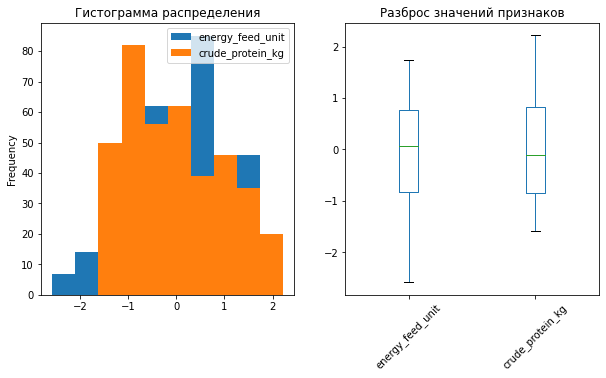

In [114]:
# Построим графики по количественным признакам тренировочного датафрейма
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_3[num_columns_3].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_3[num_columns_3].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данные успешно отмасштабированы

#### Обучение модели

In [115]:
# Импортируем модель
model_lr_3 = LinearRegression()

# Обучим модель на тренировочной выборке
model_lr_3.fit(X_train_3, y_train_3)

# Сохраним результаты предсказания
predictions_3 = model_lr_3.predict(X_test_3)

#### Оценка качества модели

In [116]:
# Рассчитаем коэффициент детерминации R²
r2_3 = r2_score(y_test_3, predictions_3)
print(f'Коэффициент детерминации R² = {r2_3}')

Коэффициент детерминации R² = 0.8381272705857857


Выполним анализ остатокв

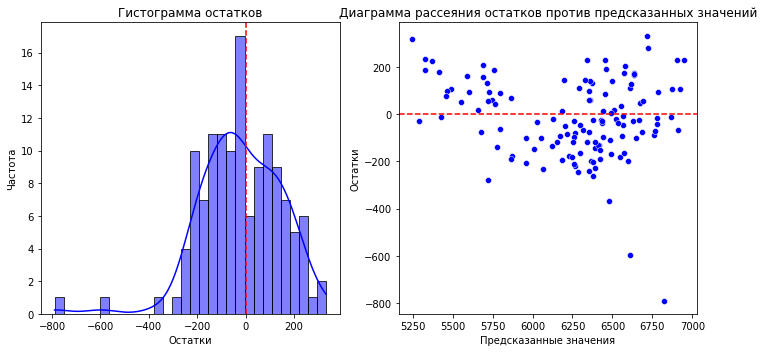

In [117]:
# Рассчитаем остатки
residuals_3 = y_test_3 - predictions_3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Гистограмма остатков
sns.histplot(residuals_3, kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title('Гистограмма остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частота')
axes[0].axvline(0, color='red', linestyle='--')  # Добавляем красную линию по оси X=0

# Диаграмма рассеяния: Остатки против предсказанных значений
sns.scatterplot(x=predictions_3, y=residuals_3, color='blue', ax=axes[1])
axes[1].set_title('Диаграмма рассеяния остатков против предсказанных значений')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')
axes[1].axhline(0, color='red', linestyle='--')  # Добавляем красную линию по оси Y=0

# Улучшаем расположение графиков
plt.tight_layout()
plt.show()

По полученным результатам оценки качества второй модели можно сделать следующие выводы:

- Коэффициент детерминации R², модели при добавлении дополнительного признака равен 0.838, при  R²=0.795 у первой модели. Это значит, что предсказанные значения теперь на 83.8% ближе к истине, чем среднее значение целевого признака;
- Анализ остатков показал, что модель стала хуже. Это видно по построенной частотной гистограмме (нормальное распределение, смещенное влево), которое сообщает нам теперь еще о больших завышении предсказанных значениях. Модель после добавлении признака `Имя Папы`, начала предсказывать удой хуже, чем первая модель и вторая модель. Диаграмма рассеяния третьей модели, показывает, что у модели непостоянство остатков. График в целом остался примерно таким же, но еще более с худшими результатами чем у первой и второй модели;

Исходя из полученных графиков, можно прийти к выводу, что третья модель, даже при увеличении значения коэффициента детерминации, для предсказания целевого признака `Удой` использовать нельзя.

### Сравнение трех моделей линейной регрессии

Сопоставим качество трёх моделей по коэффициенту детерминации и анализу остатков.
1. Первая модель имеет коэффициент детерминации `R² = 0.795`, что является худшим результатом среди обученных моделей. Однако, по произведенному анализу остатков, можно сказать, что первая модель лучше всего справляется с прогнозом удоя.
2. Вторая модель имеет коэффициент детерминации, равный `R² = 0.804`. Произведенный анализ остатков второй модели, не сильно отличается от результатов анализа первой модели. Однако, с прогнозом целевого признака удой справляется хуже, чем первая модель. 
3. Третья модель имеет лучший результат по коэффициенту детерминации `R² = 0.838`. Это должно было означать, что полученная модель, лучше справляется с прогнозированием целевого признака - `Удой`, чем остальные модели, но анализ остатков показал худший результат у третьей модели. Диаграмма рассеяния у данной модели, показывает наибольшее непостоянство остатков.

#### Оценка качества модели по метрикам MSE, RMSE, MAE

In [118]:
# Посчитаем метрики для первой модели
print(f'Метрики первой модели')
mse_1 = mean_squared_error(y_test, predictions)
print(f'Метрика MSE: {mse_1}')
rmse_1 = mean_squared_error(y_test, predictions, squared=False)
print(f'Метрика RMSE: {rmse_1}')
mae_1 = mean_absolute_error(y_test, predictions)
print(f'Метрика MAE: {mae_1}')
print()
# Посчитаем метрики для второй модели
print(f'Метрики второй модели')
mse_2 = mean_squared_error(y_test_2, predictions_2)
print(f'Метрика MSE: {mse_2}')
rmse_2 = mean_squared_error(y_test_2, predictions_2, squared=False)
print(f'Метрика RMSE: {rmse_2}')
mae_2 = mean_absolute_error(y_test_2, predictions_2)
print(f'Метрика MAE: {mae_2}')
print()
# Посчитаем метрики для второй модели
print(f'Метрики третьей модели')
mse_3 = mean_squared_error(y_test_3, predictions_3)
print(f'Метрика MSE: {mse_2}')
rmse_3 = mean_squared_error(y_test_3, predictions_3, squared=False)
print(f'Метрика RMSE: {rmse_2}')
mae_3 = mean_absolute_error(y_test_3, predictions_3)
print(f'Метрика MAE: {mae_2}')

Метрики первой модели
Метрика MSE: 35980.775606024814
Метрика RMSE: 189.68599211861905
Метрика MAE: 149.55489618942323

Метрики второй модели
Метрика MSE: 33888.66934246259
Метрика RMSE: 184.0887539815037
Метрика MAE: 141.42782530448832

Метрики третьей модели
Метрика MSE: 33888.66934246259
Метрика RMSE: 184.0887539815037
Метрика MAE: 141.42782530448832


Вторая и третья модели показали одинаковые результаты. Они лучше первой модели по трём метрикам: MSE, RMSE и MAE. 
Можно выбрать третью модель как лучшую.

In [119]:
# Расчет доверительного интервала на тренировочной выборке

train_predictions_2 = model_lr_2.predict(X_train_2)
train_residuals_2 = y_train_2 - train_predictions_2

# Квантили ошибок (95% доверительный интервал)
lower_bound = np.percentile(train_residuals_2, 2.5)
upper_bound = np.percentile(train_residuals_2, 97.5)

print(f"Доверительный интервал для предсказаний лучшей модели:")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

Доверительный интервал для предсказаний лучшей модели:
Нижняя граница: -373.06078565688836
Верхняя граница: 352.1295804624988


### Прогноз удоя коровы по данным `cow_buy`

Выполним подготовку данных в датасете `cow_buy` для прогноза удоя

In [120]:
# Переместим существующий столбец dad_name на последнюю позицию
dad_name_col = cow_buy.pop('dad_name')
cow_buy.insert(len(cow_buy.columns), 'dad_name', dad_name_col)

# Добавим новые столбцы в указанные позиции
cow_buy.insert(0, 'energy_feed_unit', ferma_main['energy_feed_unit'].mean() * 1.05)
cow_buy.insert(1, 'crude_protein_kg', ferma_main['crude_protein_kg'].mean() * 1.05)
cow_buy.insert(2, 'sugar_protein_ratio', ferma_main['sugar_protein_ratio'].astype('int').mean() * 1.05)

In [121]:
check_data(cow_buy)

energy_feed_unit  crude_protein_kg  sugar_protein_ratio            breed  \
0         15.600375          2.044724             0.722885   Вис Бик Айдиал   
1         15.600375          2.044724             0.722885   Вис Бик Айдиал   
2         15.600375          2.044724             0.722885  РефлешнСоверинг   
3         15.600375          2.044724             0.722885  РефлешнСоверинг   
4         15.600375          2.044724             0.722885  РефлешнСоверинг   

  pasture_type bull_breed  fat_content_percent  protein_percent          age  \
0    Холмистое     Айдиал                 3.58            3.076  более_2_лет   
1    Равнинное    Соверин                 3.54            3.081  менее_2_лет   
2    Равнинное    Соверин                 3.59            3.074  более_2_лет   
3    Холмистое     Айдиал                 3.40            3.061  более_2_лет   
4    Равнинное     Айдиал                 3.64            3.074  более_2_лет   

   dad_name  
0  Геркулес  
1    Буйный  
2     Барин  
3    Буйный  
4    Буйный

energy_feed_unit  crude_protein_kg  sugar_protein_ratio            breed  \
15         15.600375          2.044724             0.722885  РефлешнСоверинг   
16         15.600375          2.044724             0.722885   Вис Бик Айдиал   
17         15.600375          2.044724             0.722885  РефлешнСоверинг   
18         15.600375          2.044724             0.722885   Вис Бик Айдиал   
19         15.600375          2.044724             0.722885  РефлешнСоверинг   

   pasture_type bull_breed  fat_content_percent  protein_percent          age  \
15    Холмистое     Айдиал                 3.40            3.065  более_2_лет   
16    Холмистое    Соверин                 3.73            3.079  более_2_лет   
17    Равнинное    Соверин                 3.77            3.053  менее_2_лет   
18    Равнинное    Соверин                 3.34            3.069  более_2_лет   
19    Равнинное     Айдиал                 3.64            3.074  более_2_лет   

    dad_name  
15    Буйный  
16  Соловчик  
17  Геркулес  
18    Буйный  
19    Буйный

(20, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   energy_feed_unit     20 non-null     float64
 1   crude_protein_kg     20 non-null     float64
 2   sugar_protein_ratio  20 non-null     float64
 3   breed                20 non-null     object 
 4   pasture_type         20 non-null     object 
 5   bull_breed           20 non-null     object 
 6   fat_content_percent  20 non-null     float64
 7   protein_percent      20 non-null     float64
 8   age                  20 non-null     object 
 9   dad_name             20 non-null     object 
dtypes: float64(5), object(5)
memory usage: 1.7+ KB


None

#### Подготовка данных для модели линейной регрессии

Удалим признак `protein_percent` перед прогназированием целевого признака `Удой`

In [122]:
cow_buy_protein_percent = cow_buy['protein_percent']
cow_buy = cow_buy.drop('protein_percent', axis=1) # входные признаки
cow_buy.head()

energy_feed_unit  crude_protein_kg  sugar_protein_ratio            breed  \
0         15.600375          2.044724             0.722885   Вис Бик Айдиал   
1         15.600375          2.044724             0.722885   Вис Бик Айдиал   
2         15.600375          2.044724             0.722885  РефлешнСоверинг   
3         15.600375          2.044724             0.722885  РефлешнСоверинг   
4         15.600375          2.044724             0.722885  РефлешнСоверинг   

  pasture_type bull_breed  fat_content_percent          age  dad_name  
0    Холмистое     Айдиал                 3.58  более_2_лет  Геркулес  
1    Равнинное    Соверин                 3.54  менее_2_лет    Буйный  
2    Равнинное    Соверин                 3.59  более_2_лет     Барин  
3    Холмистое     Айдиал                 3.40  более_2_лет    Буйный  
4    Равнинное     Айдиал                 3.64  более_2_лет    Буйный

In [123]:
# Преобразование текстовых значений в 1 и 0: "более_2_лет" -> 1, "менее_2_лет" -> 0
cow_buy['age'] = cow_buy['age'].map({'более_2_лет': 1, 'менее_2_лет': 0})
cow_buy['age'] = cow_buy['age'].astype('category')

#### Выполним масштабирование и кодировку на тренировочной выборке

In [124]:
# Выполним масштабирование количественных признаков
num_col_cow_buy = cow_buy.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler_cow_buy = StandardScaler()

# Применяем масштабирование
X_cow_buy_scaler = scaler_cow_buy.fit_transform(cow_buy[num_col_cow_buy])

# Создадим датафрейм
X_cow_buy_scaler = pd.DataFrame(X_cow_buy_scaler, columns=num_col_cow_buy)
X_cow_buy_scaler.head()

energy_feed_unit  crude_protein_kg  sugar_protein_ratio  \
0               1.0               0.0                  1.0   
1               1.0               0.0                  1.0   
2               1.0               0.0                  1.0   
3               1.0               0.0                  1.0   
4               1.0               0.0                  1.0   

   fat_content_percent  
0             0.020225  
1            -0.303380  
2             0.101127  
3            -1.436000  
4             0.505634

In [125]:
cat_col_cow_buy = cow_buy.select_dtypes(include=['category', 'object']).columns.tolist()

ohe_cow_buy = OneHotEncoder(sparse=False, drop='first')

# Применяем масштабирование
X_cow_buy_ohe = ohe_cow_buy.fit_transform(cow_buy[cat_col_cow_buy])

# Сохраним список новых столбоц
ohe_cow_buy_col_name = ohe_cow_buy.get_feature_names()

# Создадим датафрейм
X_cow_buy_ohe = pd.DataFrame(X_cow_buy_ohe, columns=ohe_cow_buy_col_name)
X_cow_buy_ohe.head()

x0_РефлешнСоверинг  x1_Холмистое  x2_Соверин  x3_1  x4_Буйный  x4_Геркулес  \
0                 0.0           1.0         0.0   1.0        0.0          1.0   
1                 0.0           0.0         1.0   0.0        1.0          0.0   
2                 1.0           0.0         1.0   1.0        0.0          0.0   
3                 1.0           1.0         0.0   1.0        1.0          0.0   
4                 1.0           0.0         0.0   1.0        1.0          0.0   

   x4_Соловчик  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [126]:
# Объединим маштабирование и кодировку данных в датафрем
X_cow_buy = pd.concat([X_cow_buy_ohe, X_cow_buy_scaler], axis=1)

Проверим полученные датафреймы

In [127]:
display(X_cow_buy.head())
X_cow_buy.shape

x0_РефлешнСоверинг  x1_Холмистое  x2_Соверин  x3_1  x4_Буйный  x4_Геркулес  \
0                 0.0           1.0         0.0   1.0        0.0          1.0   
1                 0.0           0.0         1.0   0.0        1.0          0.0   
2                 1.0           0.0         1.0   1.0        0.0          0.0   
3                 1.0           1.0         0.0   1.0        1.0          0.0   
4                 1.0           0.0         0.0   1.0        1.0          0.0   

   x4_Соловчик  energy_feed_unit  crude_protein_kg  sugar_protein_ratio  \
0          0.0               1.0               0.0                  1.0   
1          0.0               1.0               0.0                  1.0   
2          0.0               1.0               0.0                  1.0   
3          0.0               1.0               0.0                  1.0   
4          0.0               1.0               0.0                  1.0   

   fat_content_percent  
0             0.020225  
1            -0.303380  
2             0.101127  
3            -1.436000  
4             0.505634

(20, 11)

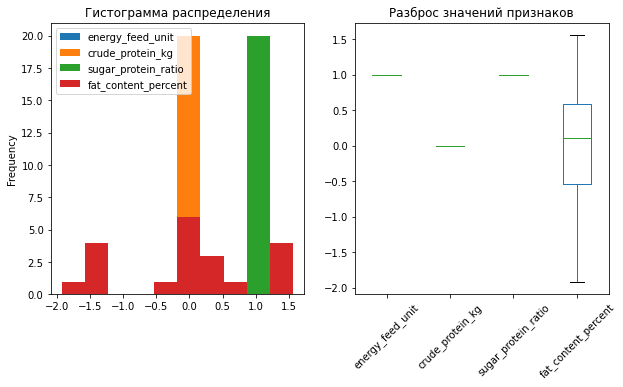

In [128]:
# Построим графики по количественным признакам тренировочного датафрейма
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_cow_buy[num_col_cow_buy].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_cow_buy[num_col_cow_buy].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данные успешно отмасштабированы

#### Прогноз удоя

In [129]:
# Сохраним результаты предсказания
predictions_cow_buy = model_lr_3.predict(X_cow_buy)

In [130]:
cow_buy['predictions_yield'] = predictions_cow_buy
cow_buy

energy_feed_unit  crude_protein_kg  sugar_protein_ratio            breed  \
0          15.600375          2.044724             0.722885   Вис Бик Айдиал   
1          15.600375          2.044724             0.722885   Вис Бик Айдиал   
2          15.600375          2.044724             0.722885  РефлешнСоверинг   
3          15.600375          2.044724             0.722885  РефлешнСоверинг   
4          15.600375          2.044724             0.722885  РефлешнСоверинг   
5          15.600375          2.044724             0.722885  РефлешнСоверинг   
6          15.600375          2.044724             0.722885   Вис Бик Айдиал   
7          15.600375          2.044724             0.722885   Вис Бик Айдиал   
8          15.600375          2.044724             0.722885  РефлешнСоверинг   
9          15.600375          2.044724             0.722885  РефлешнСоверинг   
10         15.600375          2.044724             0.722885   Вис Бик Айдиал   
11         15.600375          2.044724             0.722885  РефлешнСоверинг   
12         15.600375          2.044724             0.722885   Вис Бик Айдиал   
13         15.600375          2.044724             0.722885   Вис Бик Айдиал   
14         15.600375          2.044724             0.722885  РефлешнСоверинг   
15         15.600375          2.044724             0.722885  РефлешнСоверинг   
16         15.600375          2.044724             0.722885   Вис Бик Айдиал   
17         15.600375          2.044724             0.722885  РефлешнСоверинг   
18         15.600375          2.044724             0.722885   Вис Бик Айдиал   
19         15.600375          2.044724             0.722885  РефлешнСоверинг   

   pasture_type bull_breed  fat_content_percent age  dad_name  \
0     Холмистое     Айдиал                 3.58   1  Геркулес   
1     Равнинное    Соверин                 3.54   0    Буйный   
2     Равнинное    Соверин                 3.59   1     Барин   
3     Холмистое     Айдиал                 3.40   1    Буйный   
4     Равнинное     Айдиал                 3.64   1    Буйный   
5     Равнинное    Соверин                 3.63   0  Геркулес   
6     Холмистое     Айдиал                 3.58   1  Геркулес   
7     Равнинное    Соверин                 3.57   1    Буйный   
8     Равнинное    Соверин                 3.59   1     Барин   
9     Холмистое     Айдиал                 3.40   0    Буйный   
10    Холмистое    Соверин                 3.73   1  Соловчик   
11    Равнинное    Соверин                 3.73   1  Геркулес   
12    Холмистое     Айдиал                 3.68   1  Геркулес   
13    Холмистое    Соверин                 3.42   0     Барин   
14    Равнинное    Соверин                 3.59   1     Барин   
15    Холмистое     Айдиал                 3.40   1    Буйный   
16    Холмистое    Соверин                 3.73   1  Соловчик   
17    Равнинное    Соверин                 3.77   0  Геркулес   
18    Равнинное    Соверин                 3.34   1    Буйный   
19    Равнинное     Айдиал                 3.64   1    Буйный   

    predictions_yield  
0         6286.191706  
1         6373.360261  
2         6268.644935  
3         6416.183698  
4         6488.791038  
5         6482.569667  
6         6286.191706  
7         6397.321594  
8         6268.644935  
9         6404.971875  
10        6591.880289  
11        6536.279858  
12        6328.690074  
13        6075.849665  
14        6268.644935  
15        6416.183698  
16        6591.880289  
17        6542.067383  
18        6299.575347  
19        6488.791038

## Обучение модели логистической регрессии

### Подготовка данных

Разобьем датасет `ferma_main` на таргет и фичи

In [131]:
ferma_main.head()

id  milk_yield_kg  energy_feed_unit  crude_protein_kg sugar_protein_ratio  \
0   1           5863              14.2             1.743               False   
1   2           5529              12.8             2.138               False   
2   3           5810              14.0             1.854               False   
4   5           5302              12.8             1.675               False   
6   7           5910              13.2             1.792               False   

             breed pasture_type bull_breed fat_content_percent  \
0   Вис Бик Айдиал    Равнинное     Айдиал               False   
1   Вис Бик Айдиал    Равнинное    Соверин               False   
2  РефлешнСоверинг    Холмистое    Соверин               False   
4   Вис Бик Айдиал    Равнинное    Соверин                True   
6   Вис Бик Айдиал    Равнинное    Соверин               False   

   protein_percent milk_taste age  
0            3.076          1   1  
1            3.079          1   0  
2            3.074          0   1  
4            3.073          1   0  
6            3.077          1   1

In [132]:
X_4 = ferma_main.drop(['id', 'milk_yield_kg', 'milk_taste'], axis=1) # входные признаки
y_4 = ferma_main['milk_taste'] # целевой признак

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X_4,
    y_4,
    random_state=RANDOM_STATE
)

In [133]:
# Выполним проверку размерности датафреймов
display(X_train_4.shape)
display(X_test_4.shape)
display(y_train_4.shape)
display(y_test_4.shape)

(390, 9)

(130, 9)

(390,)

(130,)

### Масштабирование и кодирование признаков

In [134]:
cat_columns_4 = X_train_4.select_dtypes(include=['category', 'object']).columns.tolist()

ohe_4 = OneHotEncoder(sparse=False, drop='first')

# Выполним кодирование кат-ых признаков
X_train_4_ohe = ohe_4.fit_transform(X_train_4[cat_columns_4])
X_test_4_ohe = ohe_4.transform(X_test_4[cat_columns_4])

# Сохраним список новых столбоц
ohe_col_name_4 = ohe_4.get_feature_names()

# Создадим датафремы
X_train_4_ohe = pd.DataFrame(X_train_4_ohe, columns=ohe_col_name_4)
X_test_4_ohe = pd.DataFrame(X_test_4_ohe, columns=ohe_col_name_4)

In [135]:
num_columns_4 = X_train_4.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler_4 = StandardScaler()

X_train_4_scaler = scaler_4.fit_transform(X_train_4[num_columns_4])
X_test_4_scaler = scaler_4.transform(X_test_4[num_columns_4])

X_train_4_scaler = pd.DataFrame(X_train_4_scaler, columns=num_columns_4)
X_test_4_scaler = pd.DataFrame(X_test_4_scaler, columns=num_columns_4)

In [136]:
X_train_4 = pd.concat([X_train_4_ohe, X_train_4_scaler], axis=1)
X_test_4 = pd.concat([X_test_4_ohe, X_test_4_scaler], axis=1)

In [137]:
display(X_train_4.head())
display(X_train_4.shape)
display(X_test_4.head())
X_test_4.shape

x0_True  x1_РефлешнСоверинг  x2_Холмистое  x3_Соверин  x4_True  x5_1  \
0      1.0                 0.0           1.0         0.0      1.0   1.0   
1      0.0                 0.0           1.0         1.0      0.0   1.0   
2      1.0                 1.0           0.0         1.0      1.0   1.0   
3      0.0                 1.0           1.0         1.0      0.0   1.0   
4      1.0                 1.0           0.0         0.0      1.0   1.0   

   energy_feed_unit  crude_protein_kg  protein_percent  
0          1.744650          1.156219         0.152082  
1         -1.258603         -1.544032         0.959049  
2         -0.021969          1.211438        -1.058368  
3          0.508016         -1.295543         0.152082  
4          0.949671          0.543278        -1.461852

(390, 9)

x0_True  x1_РефлешнСоверинг  x2_Холмистое  x3_Соверин  x4_True  x5_1  \
0      0.0                 0.0           1.0         1.0      0.0   1.0   
1      0.0                 0.0           1.0         1.0      0.0   1.0   
2      1.0                 1.0           1.0         0.0      1.0   1.0   
3      1.0                 0.0           1.0         1.0      1.0   1.0   
4      1.0                 0.0           0.0         0.0      1.0   1.0   

   energy_feed_unit  crude_protein_kg  protein_percent  
0         -0.463624         -0.848262        -0.251401  
1         -1.346934         -0.329195         0.959049  
2         -0.551955         -0.163536         0.555566  
3          0.508016          0.278223         1.766017  
4          1.302995          1.647675        -0.654885

(130, 9)

### Обучение модели

In [138]:
# Импортируем модель
clf = LogisticRegression()

# Обучим модель на тренировочной выборке
clf.fit(X_train_4, y_train_4)

# Сохраним результаты предсказания
clf_predictions = clf.predict(X_test_4)

#### Оценка качества модели

In [139]:
# Рассчитаем метрики accuracy, precision, recall
accuracy = accuracy_score(y_test_4, clf_predictions)
precision = precision_score(y_test_4, clf_predictions)
recall = recall_score(y_test_4, clf_predictions)

print('accuracy: ', round(accuracy, 3))
print('precision: ', round(precision, 3))
print('recall: ', round(recall, 3))

accuracy:  0.608
precision:  0.631
recall:  0.833


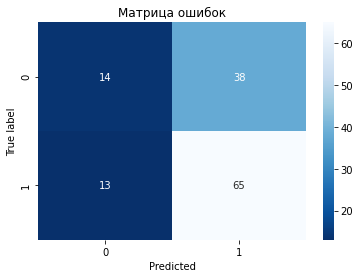

In [140]:
# Построим матрицу ошибок Confusion_Matrix
cm = confusion_matrix(y_test_4, clf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

plt.title('Матрица ошибок')
plt.ylabel('True label')
plt.xlabel('Predicted');

В процессе предобработке данных, вкусовые характеристики молока были преобразованы в бинарный код: **"вкусно" - 1, "не вкусно" - 0**.

Анализируя матрицу ошибок, можно сделать следующие выводы:

- Ошибка первого рода (FP) указывает на 38 случаев, когда модель ошибочно относит молоко к классу 1 — «вкусно». Такая ошибка недопустима в нашем случае, поскольку задача заказчика — приобрести корову, которая даёт вкусное молоко. Поэтому ошибка FP может привести к покупке коров с невкусным молоком из за ошибки модели.

- Ошибка второго рода (FN) указывает на 13 случаев, когда модель ошибочно относит вкус молока к классу 0 — «невкусно». Такая ошибка может привести к тому, что мы не купим корову с вкусным молоком. В этом случае допущения более приемлемы.

Из вышесказанного приходим к выводу, что надо уменьшить ошибку первого рода, что, соответственно, увеличит метрику pression и уменьшит метрику recall.

#### Настройка порога классификации

Создадим таблицу в которой отобразим оценку пренадлежности классу и истинные значения из тренировочной выборки

In [141]:
y_proba = clf.predict_proba(X_test_4)[:,1]
data = pd.DataFrame(zip(y_test_4, y_proba), columns=['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)
data.head()

y_valid   y_proba
51         1  0.891691
115        1  0.879633
26         1  0.853728
52         1  0.827925
75         0  0.827074

Получим список с порогами классификации выше 0.5, так как для увеличения pression требуется увеличить пороговое значение для классификации. После выполним рассчет по рассчетку принадлежности к классу с новыми пороговыми заначениями.

In [142]:
thresholds = [round(i,2) for i in np.linspace(0.8,1, num=12, endpoint=False)]
print('Пороги классификации:', thresholds)
print()

# создаём переменную, которая будет хранить список новых колонок
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>i else 0)
data.sample(5)

Пороги классификации: [0.8, 0.82, 0.83, 0.85, 0.87, 0.88, 0.9, 0.92, 0.93, 0.95, 0.97, 0.98]



y_valid   y_proba  y_pred_0.8  y_pred_0.82  y_pred_0.83  y_pred_0.85  \
113        1  0.751404           0            0            0            0   
25         0  0.353404           0            0            0            0   
93         1  0.736829           0            0            0            0   
107        1  0.492541           0            0            0            0   
32         1  0.724369           0            0            0            0   

     y_pred_0.87  y_pred_0.88  y_pred_0.9  y_pred_0.92  y_pred_0.93  \
113            0            0           0            0            0   
25             0            0           0            0            0   
93             0            0           0            0            0   
107            0            0           0            0            0   
32             0            0           0            0            0   

     y_pred_0.95  y_pred_0.97  y_pred_0.98  
113            0            0            0  
25             0            0            0  
93             0            0            0  
107            0            0            0  
32             0            0            0

In [143]:
data_proba = pd.DataFrame(columns=['threshold', 'precision', 'fp', 'fn'])

for i in range(len(thresholds)):
    fp = ((data[columns[i]] == 1) & (data['y_valid'] == 0)).sum() # FP: y_pred = 1, y_true = 0
    fn = ((data[columns[i]] == 0) & (data['y_valid'] == 1)).sum() # FN: y_pred = 0, y_true = 1
    precision = precision_score(data['y_valid'], data[columns[i]], zero_division=0)
    data_proba = pd.concat([data_proba, pd.DataFrame({'threshold': [thresholds[i]],
                                                    'precision': [precision],
                                                    'fp': [fp],
                                                    'fn': [fn]})],
                                                   ignore_index=True
                          )
data_proba

threshold  precision fp  fn
0        0.80        0.9  1  69
1        0.82        0.8  1  74
2        0.83        1.0  0  75
3        0.85        1.0  0  75
4        0.87        1.0  0  76
5        0.88        1.0  0  77
6        0.90        0.0  0  78
7        0.92        0.0  0  78
8        0.93        0.0  0  78
9        0.95        0.0  0  78
10       0.97        0.0  0  78
11       0.98        0.0  0  78

Определен новый порог классификации, равный 0.83, при котором ошибка `FP` минимальна, равна 0, а метрика `precision` равна 1.0.

Визуализируем новую матрицу ошибок

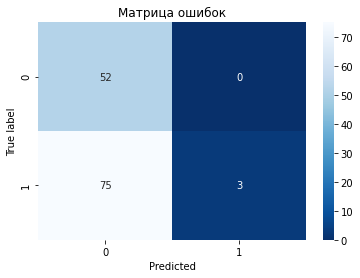

In [144]:
# Установим новый порог
threshold = 0.83
y_pred_custom = (y_proba >= threshold).astype(int)

# Построим матрицу ошибок Confusion_Matrix
cm = confusion_matrix(y_test_4, y_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

plt.title('Матрица ошибок')
plt.ylabel('True label')
plt.xlabel('Predicted');

Анализируя новую матрицу ошибок можно сдлеать следующие выводы:

- Отсутствие FP:
  Модель не совершает ложноположительных ошибок и не относит невкусное молоко к классу "вкусно". Это важно, в нашем случае, так как важно избегать покупки коров с невкусным молоком.
- Высокий FN:
  Высокое значение ошибок второго рода (75) указывает на то, что модель не распознаёт много коров, дающих вкусное молоко, что может привести к упущению потенциальных коров с хорошим вкусом.
- Низкое значение TP:
  Модель распознаёт лишь 3 случая вкусного молока, что является сильным ограничением при выборе нужной коровы.

### Прогноз вкуса молока по данным `cow_buy`

Выполним подготовку данных в датасете `cow_buy` для прогноза удоя

In [145]:
# Отоброзим датасет
check_data(cow_buy)

energy_feed_unit  crude_protein_kg  sugar_protein_ratio            breed  \
0         15.600375          2.044724             0.722885   Вис Бик Айдиал   
1         15.600375          2.044724             0.722885   Вис Бик Айдиал   
2         15.600375          2.044724             0.722885  РефлешнСоверинг   
3         15.600375          2.044724             0.722885  РефлешнСоверинг   
4         15.600375          2.044724             0.722885  РефлешнСоверинг   

  pasture_type bull_breed  fat_content_percent age  dad_name  \
0    Холмистое     Айдиал                 3.58   1  Геркулес   
1    Равнинное    Соверин                 3.54   0    Буйный   
2    Равнинное    Соверин                 3.59   1     Барин   
3    Холмистое     Айдиал                 3.40   1    Буйный   
4    Равнинное     Айдиал                 3.64   1    Буйный   

   predictions_yield  
0        6286.191706  
1        6373.360261  
2        6268.644935  
3        6416.183698  
4        6488.791038

energy_feed_unit  crude_protein_kg  sugar_protein_ratio            breed  \
15         15.600375          2.044724             0.722885  РефлешнСоверинг   
16         15.600375          2.044724             0.722885   Вис Бик Айдиал   
17         15.600375          2.044724             0.722885  РефлешнСоверинг   
18         15.600375          2.044724             0.722885   Вис Бик Айдиал   
19         15.600375          2.044724             0.722885  РефлешнСоверинг   

   pasture_type bull_breed  fat_content_percent age  dad_name  \
15    Холмистое     Айдиал                 3.40   1    Буйный   
16    Холмистое    Соверин                 3.73   1  Соловчик   
17    Равнинное    Соверин                 3.77   0  Геркулес   
18    Равнинное    Соверин                 3.34   1    Буйный   
19    Равнинное     Айдиал                 3.64   1    Буйный   

    predictions_yield  
15        6416.183698  
16        6591.880289  
17        6542.067383  
18        6299.575347  
19        6488.791038

(20, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   energy_feed_unit     20 non-null     float64 
 1   crude_protein_kg     20 non-null     float64 
 2   sugar_protein_ratio  20 non-null     float64 
 3   breed                20 non-null     object  
 4   pasture_type         20 non-null     object  
 5   bull_breed           20 non-null     object  
 6   fat_content_percent  20 non-null     float64 
 7   age                  20 non-null     category
 8   dad_name             20 non-null     object  
 9   predictions_yield    20 non-null     float64 
dtypes: category(1), float64(5), object(4)
memory usage: 1.7+ KB


None

#### Подготовка данных для модели логистической регрессии

Вернем признак `protein_percent` в датасет `cow_buy` для прогназирования `вкуса молока`

In [146]:
cow_buy_clf = cow_buy.copy()

cow_buy_clf.insert(7, 'protein_percent', cow_buy_protein_percent)

# Удалим столбцы 'dad_name' и 'predictions_yield'
cow_buy_clf = cow_buy_clf.drop(['dad_name', 'predictions_yield'], axis=1) # входные признаки
cow_buy_clf.head()

energy_feed_unit  crude_protein_kg  sugar_protein_ratio            breed  \
0         15.600375          2.044724             0.722885   Вис Бик Айдиал   
1         15.600375          2.044724             0.722885   Вис Бик Айдиал   
2         15.600375          2.044724             0.722885  РефлешнСоверинг   
3         15.600375          2.044724             0.722885  РефлешнСоверинг   
4         15.600375          2.044724             0.722885  РефлешнСоверинг   

  pasture_type bull_breed  fat_content_percent  protein_percent age  
0    Холмистое     Айдиал                 3.58            3.076   1  
1    Равнинное    Соверин                 3.54            3.081   0  
2    Равнинное    Соверин                 3.59            3.074   1  
3    Холмистое     Айдиал                 3.40            3.061   1  
4    Равнинное     Айдиал                 3.64            3.074   1

#### Выполним масштабирование и кодировку на тренировочной выборке

In [147]:
# Выполним масштабирование количественных признаков
num_col_cow_buy_clf = cow_buy_clf.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler_cow_buy_clf = StandardScaler()

# Применяем масштабирование
X_cow_buy_clf_scaler = scaler_cow_buy_clf.fit_transform(cow_buy_clf[num_col_cow_buy_clf])

# Создадим датафрейм
X_cow_buy_clf_scaler = pd.DataFrame(X_cow_buy_clf_scaler, columns=num_col_cow_buy_clf)
X_cow_buy_clf_scaler.head()

energy_feed_unit  crude_protein_kg  sugar_protein_ratio  \
0               1.0               0.0                  1.0   
1               1.0               0.0                  1.0   
2               1.0               0.0                  1.0   
3               1.0               0.0                  1.0   
4               1.0               0.0                  1.0   

   fat_content_percent  protein_percent  
0             0.020225         0.645020  
1            -0.303380         1.141190  
2             0.101127         0.446553  
3            -1.436000        -0.843488  
4             0.505634         0.446553

In [148]:
cat_col_cow_buy_clf = cow_buy_clf.select_dtypes(include=['category', 'object']).columns.tolist()

ohe_cow_buy_clf = OneHotEncoder(sparse=False, drop='first')

# Применяем масштабирование
X_cow_buy_clf_ohe = ohe_cow_buy_clf.fit_transform(cow_buy_clf[cat_col_cow_buy_clf])

# Сохраним список новых столбоц
ohe_cow_buy_clf_col_name = ohe_cow_buy_clf.get_feature_names()

# Создадим датафрейм
X_cow_buy_clf_ohe = pd.DataFrame(X_cow_buy_clf_ohe, columns=cat_col_cow_buy_clf)
X_cow_buy_clf_ohe.head()

breed  pasture_type  bull_breed  age
0    0.0           1.0         0.0  1.0
1    0.0           0.0         1.0  0.0
2    1.0           0.0         1.0  1.0
3    1.0           1.0         0.0  1.0
4    1.0           0.0         0.0  1.0

In [149]:
# Объединим маштабирование и кодировку данных в датафрем
X_cow_buy_clf = pd.concat([X_cow_buy_clf_ohe, X_cow_buy_clf_scaler], axis=1)

Проверим полученные датафреймы

In [150]:
display(X_cow_buy_clf.head())
X_cow_buy_clf.shape

breed  pasture_type  bull_breed  age  energy_feed_unit  crude_protein_kg  \
0    0.0           1.0         0.0  1.0               1.0               0.0   
1    0.0           0.0         1.0  0.0               1.0               0.0   
2    1.0           0.0         1.0  1.0               1.0               0.0   
3    1.0           1.0         0.0  1.0               1.0               0.0   
4    1.0           0.0         0.0  1.0               1.0               0.0   

   sugar_protein_ratio  fat_content_percent  protein_percent  
0                  1.0             0.020225         0.645020  
1                  1.0            -0.303380         1.141190  
2                  1.0             0.101127         0.446553  
3                  1.0            -1.436000        -0.843488  
4                  1.0             0.505634         0.446553

(20, 9)

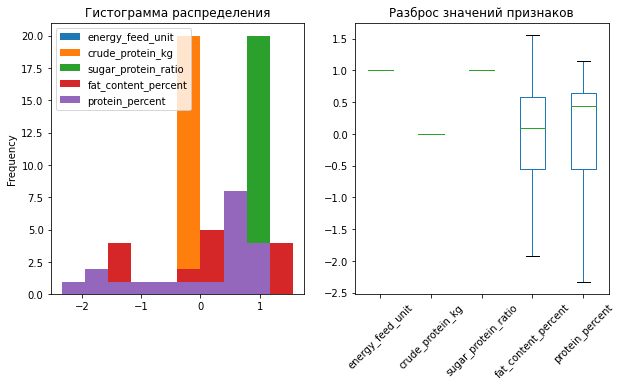

In [151]:
# Построим графики по количественным признакам тренировочного датафрейма
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_cow_buy_clf[num_col_cow_buy_clf].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_cow_buy_clf[num_col_cow_buy_clf].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данные успешно отмасштабированы

#### Прогноз вкуса молока

In [152]:
# Сохраним результаты предсказания
predictions_milk_taste = clf.predict(X_cow_buy_clf)

cow_buy['predictions_taste'] = predictions_milk_taste
cow_buy

energy_feed_unit  crude_protein_kg  sugar_protein_ratio            breed  \
0          15.600375          2.044724             0.722885   Вис Бик Айдиал   
1          15.600375          2.044724             0.722885   Вис Бик Айдиал   
2          15.600375          2.044724             0.722885  РефлешнСоверинг   
3          15.600375          2.044724             0.722885  РефлешнСоверинг   
4          15.600375          2.044724             0.722885  РефлешнСоверинг   
5          15.600375          2.044724             0.722885  РефлешнСоверинг   
6          15.600375          2.044724             0.722885   Вис Бик Айдиал   
7          15.600375          2.044724             0.722885   Вис Бик Айдиал   
8          15.600375          2.044724             0.722885  РефлешнСоверинг   
9          15.600375          2.044724             0.722885  РефлешнСоверинг   
10         15.600375          2.044724             0.722885   Вис Бик Айдиал   
11         15.600375          2.044724             0.722885  РефлешнСоверинг   
12         15.600375          2.044724             0.722885   Вис Бик Айдиал   
13         15.600375          2.044724             0.722885   Вис Бик Айдиал   
14         15.600375          2.044724             0.722885  РефлешнСоверинг   
15         15.600375          2.044724             0.722885  РефлешнСоверинг   
16         15.600375          2.044724             0.722885   Вис Бик Айдиал   
17         15.600375          2.044724             0.722885  РефлешнСоверинг   
18         15.600375          2.044724             0.722885   Вис Бик Айдиал   
19         15.600375          2.044724             0.722885  РефлешнСоверинг   

   pasture_type bull_breed  fat_content_percent age  dad_name  \
0     Холмистое     Айдиал                 3.58   1  Геркулес   
1     Равнинное    Соверин                 3.54   0    Буйный   
2     Равнинное    Соверин                 3.59   1     Барин   
3     Холмистое     Айдиал                 3.40   1    Буйный   
4     Равнинное     Айдиал                 3.64   1    Буйный   
5     Равнинное    Соверин                 3.63   0  Геркулес   
6     Холмистое     Айдиал                 3.58   1  Геркулес   
7     Равнинное    Соверин                 3.57   1    Буйный   
8     Равнинное    Соверин                 3.59   1     Барин   
9     Холмистое     Айдиал                 3.40   0    Буйный   
10    Холмистое    Соверин                 3.73   1  Соловчик   
11    Равнинное    Соверин                 3.73   1  Геркулес   
12    Холмистое     Айдиал                 3.68   1  Геркулес   
13    Холмистое    Соверин                 3.42   0     Барин   
14    Равнинное    Соверин                 3.59   1     Барин   
15    Холмистое     Айдиал                 3.40   1    Буйный   
16    Холмистое    Соверин                 3.73   1  Соловчик   
17    Равнинное    Соверин                 3.77   0  Геркулес   
18    Равнинное    Соверин                 3.34   1    Буйный   
19    Равнинное     Айдиал                 3.64   1    Буйный   

    predictions_yield  predictions_taste  
0         6286.191706                  1  
1         6373.360261                  1  
2         6268.644935                  1  
3         6416.183698                  1  
4         6488.791038                  1  
5         6482.569667                  1  
6         6286.191706                  1  
7         6397.321594                  1  
8         6268.644935                  1  
9         6404.971875                  1  
10        6591.880289                  1  
11        6536.279858                  1  
12        6328.690074                  1  
13        6075.849665                  1  
14        6268.644935                  1  
15        6416.183698                  1  
16        6591.880289                  1  
17        6542.067383                  1  
18        6299.575347                  1  
19        6488.791038                  1

In [153]:
# Получим вероятности
predictions_proba = clf.predict_proba(X_cow_buy_clf)[:, 1]

# Применим новый порог
threshold = 0.83
predictions_custom = (predictions_proba >= threshold).astype(int)

cow_buy['predictions_taste'] = predictions_custom
cow_buy

energy_feed_unit  crude_protein_kg  sugar_protein_ratio            breed  \
0          15.600375          2.044724             0.722885   Вис Бик Айдиал   
1          15.600375          2.044724             0.722885   Вис Бик Айдиал   
2          15.600375          2.044724             0.722885  РефлешнСоверинг   
3          15.600375          2.044724             0.722885  РефлешнСоверинг   
4          15.600375          2.044724             0.722885  РефлешнСоверинг   
5          15.600375          2.044724             0.722885  РефлешнСоверинг   
6          15.600375          2.044724             0.722885   Вис Бик Айдиал   
7          15.600375          2.044724             0.722885   Вис Бик Айдиал   
8          15.600375          2.044724             0.722885  РефлешнСоверинг   
9          15.600375          2.044724             0.722885  РефлешнСоверинг   
10         15.600375          2.044724             0.722885   Вис Бик Айдиал   
11         15.600375          2.044724             0.722885  РефлешнСоверинг   
12         15.600375          2.044724             0.722885   Вис Бик Айдиал   
13         15.600375          2.044724             0.722885   Вис Бик Айдиал   
14         15.600375          2.044724             0.722885  РефлешнСоверинг   
15         15.600375          2.044724             0.722885  РефлешнСоверинг   
16         15.600375          2.044724             0.722885   Вис Бик Айдиал   
17         15.600375          2.044724             0.722885  РефлешнСоверинг   
18         15.600375          2.044724             0.722885   Вис Бик Айдиал   
19         15.600375          2.044724             0.722885  РефлешнСоверинг   

   pasture_type bull_breed  fat_content_percent age  dad_name  \
0     Холмистое     Айдиал                 3.58   1  Геркулес   
1     Равнинное    Соверин                 3.54   0    Буйный   
2     Равнинное    Соверин                 3.59   1     Барин   
3     Холмистое     Айдиал                 3.40   1    Буйный   
4     Равнинное     Айдиал                 3.64   1    Буйный   
5     Равнинное    Соверин                 3.63   0  Геркулес   
6     Холмистое     Айдиал                 3.58   1  Геркулес   
7     Равнинное    Соверин                 3.57   1    Буйный   
8     Равнинное    Соверин                 3.59   1     Барин   
9     Холмистое     Айдиал                 3.40   0    Буйный   
10    Холмистое    Соверин                 3.73   1  Соловчик   
11    Равнинное    Соверин                 3.73   1  Геркулес   
12    Холмистое     Айдиал                 3.68   1  Геркулес   
13    Холмистое    Соверин                 3.42   0     Барин   
14    Равнинное    Соверин                 3.59   1     Барин   
15    Холмистое     Айдиал                 3.40   1    Буйный   
16    Холмистое    Соверин                 3.73   1  Соловчик   
17    Равнинное    Соверин                 3.77   0  Геркулес   
18    Равнинное    Соверин                 3.34   1    Буйный   
19    Равнинное     Айдиал                 3.64   1    Буйный   

    predictions_yield  predictions_taste  
0         6286.191706                  1  
1         6373.360261                  1  
2         6268.644935                  0  
3         6416.183698                  0  
4         6488.791038                  0  
5         6482.569667                  0  
6         6286.191706                  1  
7         6397.321594                  1  
8         6268.644935                  0  
9         6404.971875                  0  
10        6591.880289                  1  
11        6536.279858                  0  
12        6328.690074                  0  
13        6075.849665                  1  
14        6268.644935                  0  
15        6416.183698                  0  
16        6591.880289                  1  
17        6542.067383                  0  
18        6299.575347                  1  
19        6488.791038                  0

In [ ]:
# Преобразуем 'age' в 'int', для возможности сортировки
cow_buy['age'] = cow_buy['age'].astype('int')

cow_buy.info()

Для окончательного прогноза был применен новый порог, который является более строгим для определения коров с вкусным молоком.

## Итоговые выводы

- Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
- Коротко опишите результаты работы моделей для фермера.
    - Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
    - Какие ещё рекомендации можно ему дать?
- Сделайте выводы о моделях линейной регрессии и логистической регрессии.
    - Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
    - Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
    - Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

**Отбор коров по критериям фермера**

In [161]:
# Для отбора коров выполним сортировку итогового датасета `cow_buy`
cow_buy.sort_values(['predictions_taste', 'age', 'predictions_yield'], ascending=[False, False, False]).head()

energy_feed_unit  crude_protein_kg  sugar_protein_ratio           breed  \
10         15.600375          2.044724             0.722885  Вис Бик Айдиал   
16         15.600375          2.044724             0.722885  Вис Бик Айдиал   
7          15.600375          2.044724             0.722885  Вис Бик Айдиал   
18         15.600375          2.044724             0.722885  Вис Бик Айдиал   
0          15.600375          2.044724             0.722885  Вис Бик Айдиал   

   pasture_type bull_breed  fat_content_percent age  dad_name  \
10    Холмистое    Соверин                 3.73   1  Соловчик   
16    Холмистое    Соверин                 3.73   1  Соловчик   
7     Равнинное    Соверин                 3.57   1    Буйный   
18    Равнинное    Соверин                 3.34   1    Буйный   
0     Холмистое     Айдиал                 3.58   1  Геркулес   

    predictions_yield  predictions_taste  
10        6591.880289                  1  
16        6591.880289                  1  
7         6397.321594                  1  
18        6299.575347                  1  
0         6286.191706                  1

Исходя из полученных результатов, во время проведения работы над проектом, и критериев заказчика, можно выделить следующие особенности, на которые стоит обратить внимание при покупке новых коров.
- Корова должна быть взрослее 2 лет, продуктивность коровы и вкус молока зависят от этого показателя, это было заметно при построении диаграммы рассеяния.
- Целесообразнее купить коров с большим показателем продуктивности молока, что позволит получить дополнительный заработок на продаже молочной продукции.

В таблице выше выделены топ-5 коров с наилучшими показателями молока, которых стоит рассмотреть для покупки.

При необходимости покупки большего количества коров следует обращать внимание на возраст. В таблице, полученной от ассоциации пастбищ «ЭкоФерма», коров, подходящих под критерии заказчика и под критерий возраста, определенной в работе, подходят 15 коров и 20.

**Выводы о прогнозных моделях**

*Линейная регрессия:*

Чтобы сделать прогнозную модель более точной и наблюдать за её развитием, на каждом шагу в обучающую выборку были добавлены новые признаки. Как оказалось, эти изменения положительно сказались на качестве модели, что подтверждается результатами, соответствующими критериям фермера. Лучшая модель регрессии была отобрана на основании метрик R², MSE, RMSE и MAE. 
- Метрики R², MSE, RMSE и MAE составили: R² = 0.838, MSE = 33888.669, RMSE = 184.088, MAE = 141.428.

Для улучшения модели можно рассмотреть возможность добавления большего количества коров в обучающий датасет с возрастом менее 2 лет, так как этот категориальный признак имеет смещение в сторону взрослых коров. Также в обучающих данных наблюдается смещение удоя коровы в сторону более 6000 кг, что могло влиять при построении модели.

*Логистическая регрессия:*

Модель показала хорошие результаты для предсказания вкуса молока. Метрики precision и recall были скорректированы за счёт выбора оптимального порога, равный 0.83, чтобы уменьшить количество ошибок FP = 0 полученный спомощью Confusion Matrix.